In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#baca dataset
url ='C:/Users/HOME/Desktop/Data_iris.csv'
names = ['x1', 'x2', 'x3', 'x4', 'class']
data = pd.read_csv(url, names=names)
data["class"]=data["class"].apply(lambda x:str(x).replace('Iris-setosa','1'))
data["class"]=data["class"].apply(lambda x:str(x).replace('Iris-versicolor','0'))
data["class"]=data["class"].astype('int64')
dataT0=data.iloc[0:40]
dataV0=data.iloc[40:50]
dataT1=data.iloc[50:90]
dataV1=data.iloc[90:100]
training=[dataT0,dataT1]
validasi=[dataV0,dataV1]
dataT = pd.concat(training,ignore_index=True)
dataV = pd.concat(validasi,ignore_index=True)
print(data)

     x1   x2   x3   x4  class
0   5.1  3.5  1.4  0.2      1
1   4.9  3.0  1.4  0.2      1
2   4.7  3.2  1.3  0.2      1
3   4.6  3.1  1.5  0.2      1
4   5.0  3.6  1.4  0.2      1
5   5.4  3.9  1.7  0.4      1
6   4.6  3.4  1.4  0.3      1
7   5.0  3.4  1.5  0.2      1
8   4.4  2.9  1.4  0.2      1
9   4.9  3.1  1.5  0.1      1
10  5.4  3.7  1.5  0.2      1
11  4.8  3.4  1.6  0.2      1
12  4.8  3.0  1.4  0.1      1
13  4.3  3.0  1.1  0.1      1
14  5.8  4.0  1.2  0.2      1
15  5.7  4.4  1.5  0.4      1
16  5.4  3.9  1.3  0.4      1
17  5.1  3.5  1.4  0.3      1
18  5.7  3.8  1.7  0.3      1
19  5.1  3.8  1.5  0.3      1
20  5.4  3.4  1.7  0.2      1
21  5.1  3.7  1.5  0.4      1
22  4.6  3.6  1.0  0.2      1
23  5.1  3.3  1.7  0.5      1
24  4.8  3.4  1.9  0.2      1
25  5.0  3.0  1.6  0.2      1
26  5.0  3.4  1.6  0.4      1
27  5.2  3.5  1.5  0.2      1
28  5.2  3.4  1.4  0.2      1
29  4.7  3.2  1.6  0.2      1
..  ...  ...  ...  ...    ...
70  5.9  3.2  4.8  1.8      0
71  6.1  2

In [3]:
#Inisialisasi Variabel
tetha=np.array([0.2, 0.6, 0.3, 0.4])
bias = 0.9
alpha = 0.1
#alpha = 0.8
epoch = 60
errvalue = 0.00000

In [4]:
#Inisialisasi Fungsi
#h(x,tetha,b)
def h_function(x,tetha,bias):
    sum = 0
    for i in range(0, len(x)):
        sum+=x[i]*tetha[i]
    return sum+bias
#sigmoid
def sigmoid(f):
    sigm = 1/(1+math.exp(-f))
    return sigm
#Delta
def delta(sigm, kelas, x):
    delta = 2*(sigm-kelas)*(1-sigm)*sigm*x
    return delta
#prediksi
def predict(sigm):
    if sigm < 0.5:
        return 0
    else:
        return 1
#Error
def error(kelas, sigm):
    return (sigm-kelas)**2

In [5]:
#Data training
totalerrorT = 0.0000
saveTotalerrT = np.zeros(60)
saveEpoch = np.zeros(60)
for ep in range(0, epoch):
    print("==========Training==========")
    totalerrorT = 0
    for j in range(0,80):
        x = np.array(dataT.iloc[j,0:4])
        kelas = dataT.iloc[j,4]
        fH = h_function(x,tetha,bias)
        sigm = sigmoid(fH)
        pred = predict(sigm)
        deltaT = delta(sigm,kelas,x)
        deltaB = delta(sigm,kelas,1)
        errvalue = error(kelas, sigm)
        print("Epoch: ",ep+1)
        print("Iterasi: ",j+1)
        print("Tetha: ",tetha)
        print("x: ",x)
        print("Bias: ",bias)
        print("Kelas: ",kelas)
        print("h(x,tetha,b): ",fH)
        print("sigmoid: ",sigm)
        print("Prediction: ",pred)
        print("Delta Tetha: ",deltaT)
        print("Delta Bias: ",deltaB)
        print("Error: ",errvalue)
        print("===========================")
        totalerrorT += errvalue
        if j<79:
            for k in range(0,4):
                tetha[k] = tetha[k]-(alpha*deltaT[k])
            bias = bias-(alpha*deltaB)
        print("total error value : ",totalerrorT)
        saveTotalerrT[ep] = totalerrorT 

==========Training==========
('Epoch: ', 1)
('Iterasi: ', 1)
('Tetha: ', array([ 0.2,  0.6,  0.3,  0.4]))
('x: ', array([ 5.1,  3.5,  1.4,  0.2]))
('Bias: ', 0.9)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.5200000000000005)
('sigmoid: ', 0.9892282699548585)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.17075929e-03,  -8.03462258e-04,  -3.21384903e-04,
        -4.59121290e-05]))
('Delta Bias: ', -0.00022956064503366953)
('Error: ', 0.00011603016816540489)
('total error value : ', 0.00011603016816540489)
('Epoch: ', 1)
('Iterasi: ', 2)
('Tetha: ', array([ 0.20011708,  0.60008035,  0.30003214,  0.40000459]))
('x: ', array([ 4.9,  3. ,  1.4,  0.2]))
('Bias: ', 0.90002295606450344)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.1808835789227352)
('sigmoid: ', 0.9849451177189282)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.18772553e-03,  -1.33942380e-03,  -6.25064438e-04,
        -8.92949197e-05]))
('Delta Bias: ', -0.0004464745984979627)
('Error: ', 0.00022664948049692869)
('total error value : ', 0.

('Kelas: ', 1)
('h(x,tetha,b): ', 5.3122611589079582)
('sigmoid: ', 0.9950934282911836)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.73102081e-04,  -2.10815642e-04,  -7.18689688e-05,
        -1.91650584e-05]))
('Delta Bias: ', -4.7912645876866284e-05)
('Error: ', 2.4074445933757145e-05)
('total error value : ', 0.0025783065801420358)
('Epoch: ', 1)
('Iterasi: ', 17)
('Tetha: ', array([ 0.20241562,  0.60162619,  0.30070456,  0.40009132]))
('x: ', array([ 5.4,  3.9,  1.3,  0.4]))
('Bias: ', 0.90050829439832825)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.8908472305890118)
('sigmoid: ', 0.9925410019695182)
('Prediction: ', 1)
('Delta Tetha: ', array([ -5.96393906e-04,  -4.30728932e-04,  -1.43576311e-04,
        -4.41773264e-05]))
('Delta Bias: ', -0.00011044331588776866)
('Error: ', 5.5636651618731047e-05)
('total error value : ', 0.002633943231760767)
('Epoch: ', 1)
('Iterasi: ', 18)
('Tetha: ', array([ 0.20247526,  0.60166926,  0.30071892,  0.40009574]))
('x: ', array([ 5.1,  3.5,  1.4,  0.

('Prediction: ', 1)
('Delta Tetha: ', array([ -4.36853849e-04,  -3.33597485e-04,  -1.11199162e-04,
        -1.58855945e-05]))
('Delta Bias: ', -7.9427972545419235e-05)
('Error: ', 3.9966652186331751e-05)
('total error value : ', 0.0043826895240168754)
('Epoch: ', 1)
('Iterasi: ', 35)
('Tetha: ', array([ 0.20421447,  0.60284924,  0.30124738,  0.40018383]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 0.90086531550003046)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.2622383092066736)
('sigmoid: ', 0.9861050621051723)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.86578881e-03,  -1.18039700e-03,  -5.71159840e-04,
        -3.80773226e-05]))
('Delta Bias: ', -0.00038077322636141919)
('Error: ', 0.00019306929910111752)
('total error value : ', 0.0045757588231179931)
('Epoch: ', 1)
('Iterasi: ', 36)
('Tetha: ', array([ 0.20440105,  0.60296727,  0.3013045 ,  0.40018764]))
('x: ', array([ 5. ,  3.2,  1.2,  0.2]))
('Bias: ', 0.90090339282266663)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.29400684840998

('Prediction: ', 1)
('Delta Tetha: ', array([ 0.07234981,  0.03678804,  0.05150326,  0.01839402]))
('Delta Bias: ', 0.012262680056153307)
('Error: ', 0.98762217384977313)
('total error value : ', 11.871932471824721)
('Epoch: ', 1)
('Iterasi: ', 53)
('Tetha: ', array([ 0.13176835,  0.56960359,  0.24918048,  0.38375155]))
('x: ', array([ 6. ,  2.2,  4. ,  1. ]))
('Bias: ', 0.88789039994794516)
('Kelas: ', 0)
('h(x,tetha,b): ', 4.3121018961644859)
('sigmoid: ', 0.986771982790566)
('Prediction: ', 1)
('Delta Tetha: ', array([ 0.15456445,  0.05667363,  0.10304297,  0.02576074]))
('Delta Bias: ', 0.02576074195022025)
('Error: ', 0.97371894602042508)
('total error value : ', 12.845651417845145)
('Epoch: ', 1)
('Iterasi: ', 54)
('Tetha: ', array([ 0.11631191,  0.56393623,  0.23887618,  0.38117548]))
('x: ', array([ 6.1,  2.9,  4.7,  1.4]))
('Bias: ', 0.88531432575292313)
('Kelas: ', 0)
('h(x,tetha,b): ', 4.8865957609262773)
('sigmoid: ', 0.99250946080279)
('Prediction: ', 1)
('Delta Tetha: ', 

('Bias: ', 0.77385404444770922)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.3093845895911627)
('sigmoid: ', 0.09034870996307469)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.08019413,  0.0445523 ,  0.06682845,  0.02227615]))
('Delta Bias: ', 0.014850765731708132)
('Error: ', 0.008162889391991791)
('total error value : ', 23.291961776092538)
('Epoch: ', 1)
('Iterasi: ', 76)
('Tetha: ', array([-0.57498793,  0.25199853, -0.26063496,  0.23231545]))
('x: ', array([ 6. ,  3.4,  4.5,  1.6]))
('Bias: ', 0.77236896787453846)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.6219162110697964)
('sigmoid: ', 0.06774118013531318)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.05133615,  0.02909048,  0.03850211,  0.01368964]))
('Delta Bias: ', 0.0085560243742605537)
('Error: ', 0.0045888674861249484)
('total error value : ', 23.296550643578662)
('Epoch: ', 1)
('Iterasi: ', 77)
('Tetha: ', array([-0.58012155,  0.24908948, -0.26448517,  0.23094649]))
('x: ', array([ 6.7,  3.1,  4.7,  1.5]))
('Bias: ', 0.7715133654371

('x: ', array([ 4.8,  3. ,  1.4,  0.1]))
('Bias: ', 0.87512093935763358)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.1186342148050041)
('sigmoid: ', 0.8927011768543949)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.09866594, -0.06166621, -0.02877757, -0.00205554]))
('Delta Bias: ', -0.020555404158767658)
('Error: ', 0.011513037448431846)
('total error value : ', 1.6048830421737537)
('Epoch: ', 2)
('Iterasi: ', 14)
('Tetha: ', array([-0.06666543,  0.59208898, -0.11994978,  0.2507902 ]))
('x: ', array([ 4.3,  3. ,  1.1,  0.1]))
('Bias: ', 0.87717647977351032)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.2599163344293545)
('sigmoid: ', 0.9055024722185032)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.06953909, -0.04851564, -0.01778907, -0.00161719]))
('Delta Bias: ', -0.016171880725339843)
('Error: ', 0.0089297827568147557)
('total error value : ', 1.6138128249305683)
('Epoch: ', 2)
('Iterasi: ', 15)
('Tetha: ', array([-0.05971152,  0.59694055, -0.11817088,  0.25095191]))
('x: ', array([ 5.8,  4. ,  1

('x: ', array([ 7. ,  3.2,  4.7,  1.4]))
('Bias: ', 0.89375635211057658)
('Kelas: ', 0)
('h(x,tetha,b): ', 2.9915203864017426)
('sigmoid: ', 0.9521895727230254)
('Prediction: ', 1)
('Delta Tetha: ', array([ 0.60687256,  0.27742746,  0.40747158,  0.12137451]))
('Delta Bias: ', 0.086696080411464316)
('Error: ', 0.90666498240245763)
('total error value : ', 2.59987611456673)
('Epoch: ', 2)
('Iterasi: ', 42)
('Tetha: ', array([-0.04407244,  0.6206367 , -0.13647673,  0.24255903]))
('x: ', array([ 6.4,  3.2,  4.5,  1.5]))
('Bias: ', 0.88508674406943011)
('Kelas: ', 0)
('h(x,tetha,b): ', 2.3387538371069319)
('sigmoid: ', 0.9120361615753877)
('Prediction: ', 1)
('Delta Tetha: ', array([ 0.93656572,  0.46828286,  0.65852277,  0.21950759]))
('Delta Bias: ', 0.14633839384657024)
('Error: ', 0.83180996002116669)
('total error value : ', 3.4316860745878968)
('Epoch: ', 2)
('Iterasi: ', 43)
('Tetha: ', array([-0.13772901,  0.57380842, -0.202329  ,  0.22060827]))
('x: ', array([ 6.9,  3.1,  4.9,  1.5

('h(x,tetha,b): ', -3.7998102370232862)
('sigmoid: ', 0.021885332703127418)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0062777 ,  0.00281091,  0.00468485,  0.00159285]))
('Delta Bias: ', 0.00093697083628495683)
('Error: ', 0.00047896778752657847)
('total error value : ', 4.1910495331629534)
('Epoch: ', 2)
('Iterasi: ', 69)
('Tetha: ', array([-0.53489272,  0.39299417, -0.48659763,  0.13176603]))
('x: ', array([ 6. ,  2.9,  4.5,  1.5]))
('Bias: ', 0.80621818185159577)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.2554953813696819)
('sigmoid: ', 0.03712991985692976)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01592931,  0.00769917,  0.01194698,  0.00398233]))
('Delta Bias: ', 0.0026548849838977867)
('Error: ', 0.001378630948582027)
('total error value : ', 4.1924281641115355)
('Epoch: ', 2)
('Iterasi: ', 70)
('Tetha: ', array([-0.53648565,  0.39222425, -0.48779233,  0.1313678 ]))
('x: ', array([ 5.7,  2.6,  3.5,  1. ]))
('Bias: ', 0.80595269335320596)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.

('Error: ', 0.01922250580104572)
('total error value : ', 1.2499903606782019)
('Epoch: ', 3)
('Iterasi: ', 10)
('Tetha: ', array([-0.10381387,  0.68303507, -0.37124483,  0.14658173]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 0.89488786756144467)
('Kelas: ', 1)
('h(x,tetha,b): ', 1.9613995560507267)
('sigmoid: ', 0.8766843366982714)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.13064892, -0.08265544, -0.03999457, -0.0026663 ]))
('Delta Bias: ', -0.026663044010861794)
('Error: ', 0.015206752815545295)
('total error value : ', 1.2651971134937472)
('Epoch: ', 3)
('Iterasi: ', 11)
('Tetha: ', array([-0.09074898,  0.69130061, -0.36724537,  0.14684837]))
('x: ', array([ 5.4,  3.7,  1.5,  0.2]))
('Bias: ', 0.89755417196253084)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.4438235778857722)
('sigmoid: ', 0.9201086061576118)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.06342535, -0.04345811, -0.01761815, -0.00234909]))
('Delta Bias: ', -0.011745434437430756)
('Error: ', 0.00638263481007958

('h(x,tetha,b): ', 2.8228933650994432)
('sigmoid: ', 0.9439004738883725)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0261413 , -0.01782362, -0.00772357, -0.00118824]))
('Delta Bias: ', -0.0059412056463801098)
('Error: ', 0.0031471568299491753)
('total error value : ', 1.3750694112545143)
('Epoch: ', 3)
('Iterasi: ', 40)
('Tetha: ', array([ 0.01158092,  0.76002759, -0.33688585,  0.15135986]))
('x: ', array([ 5.1,  3.4,  1.5,  0.2]))
('Bias: ', 0.9180054038222264)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.086105080726552)
('sigmoid: ', 0.956315940707498)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01861434, -0.01240956, -0.0054748 , -0.00072997]))
('Delta Bias: ', -0.0036498697507813334)
('Error: ', 0.0019082970362708273)
('total error value : ', 1.3769777082907853)
('Epoch: ', 3)
('Iterasi: ', 41)
('Tetha: ', array([ 0.01344235,  0.76126855, -0.33633837,  0.15143286]))
('x: ', array([ 7. ,  3.2,  4.7,  1.4]))
('Bias: ', 0.91837039079730454)
('Kelas: ', 0)
('h(x,tetha,b): ', 2.07974183

('Kelas: ', 0)
('h(x,tetha,b): ', -3.5243803242803144)
('sigmoid: ', 0.028626440570802752)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00971138,  0.00445768,  0.00748254,  0.00191043]))
('Delta Bias: ', 0.0015920290035284618)
('Error: ', 0.00081947309975370175)
('total error value : ', 2.7915323410572954)
('Epoch: ', 3)
('Iterasi: ', 65)
('Tetha: ', array([-0.45903614,  0.53543293, -0.66661785,  0.0461801 ]))
('x: ', array([ 6.4,  2.9,  4.3,  1.3]))
('Bias: ', 0.84313839072334795)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3483600641666915)
('sigmoid: ', 0.03394890702848559)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01425154,  0.00645773,  0.00957525,  0.00289484]))
('Delta Bias: ', 0.0022268024254343812)
('Error: ', 0.0011525282884287582)
('total error value : ', 2.7926848693457242)
('Epoch: ', 3)
('Iterasi: ', 66)
('Tetha: ', array([-0.4604613 ,  0.53478715, -0.66757537,  0.04589061]))
('x: ', array([ 6.6,  3. ,  4.4,  1.4]))
('Bias: ', 0.84291571048080449)
('Kelas: ', 0)
('h(x,t

('total error value : ', 0.86313312383049201)
('Epoch: ', 4)
('Iterasi: ', 18)
('Tetha: ', array([-0.05394366,  0.81020482, -0.56021454,  0.05874736]))
('x: ', array([ 5.1,  3.5,  1.4,  0.3]))
('Bias: ', 0.92617380317408615)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.7201018487750295)
('sigmoid: ', 0.9382024390516331)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.03654596, -0.02508056, -0.01003222, -0.00214976]))
('Delta Bias: ', -0.0071658749040697392)
('Error: ', 0.0038189385391671168)
('total error value : ', 0.86695206236965916)
('Epoch: ', 4)
('Iterasi: ', 19)
('Tetha: ', array([-0.05028906,  0.81271287, -0.55921132,  0.05896234]))
('x: ', array([ 5.7,  3.8,  1.7,  0.3]))
('Bias: ', 0.92689039066449308)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.7955811063563543)
('sigmoid: ', 0.9424365677904277)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.03560003, -0.02373335, -0.01061755, -0.00187369]))
('Delta Bias: ', -0.0062456189803666001)
('Error: ', 0.0033135487277460227)
('total error value : ',

('total error value : ', 1.7531985625255226)
('Epoch: ', 4)
('Iterasi: ', 49)
('Tetha: ', array([-0.34428922,  0.68635904, -0.78622475, -0.01472502]))
('x: ', array([ 6.6,  2.9,  4.6,  1.3]))
('Bias: ', 0.88447805299949711)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.0331659724624682)
('sigmoid: ', 0.04594983603130647)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.02658968,  0.01168334,  0.0185322 ,  0.00523736]))
('Delta Bias: ', 0.0040287390500739449)
('Error: ', 0.0021113874313039506)
('total error value : ', 1.7553099499568265)
('Epoch: ', 4)
('Iterasi: ', 50)
('Tetha: ', array([-0.34694819,  0.6851907 , -0.78807797, -0.01524876]))
('x: ', array([ 5.2,  2.7,  3.9,  1.4]))
('Bias: ', 0.88407517909448974)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.1648928471958673)
('sigmoid: ', 0.10294772090273706)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.09887456,  0.05133871,  0.07415592,  0.02662007]))
('Delta Bias: ', 0.019014338563020355)
('Error: ', 0.010598233239067844)
('total error value : ', 1

('Epoch: ', 4)
('Iterasi: ', 73)
('Tetha: ', array([-0.41337051,  0.65376878, -0.83441902, -0.03005094]))
('x: ', array([ 5.8,  2.7,  3.9,  1.2]))
('Bias: ', 0.87227795900373006)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.050390628996579)
('sigmoid: ', 0.045200611910509766)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.02262866,  0.01053403,  0.01521582,  0.00468179]))
('Delta Bias: ', 0.0039014923171216006)
('Error: ', 0.0020430953170845175)
('total error value : ', 1.8208520003526243)
('Epoch: ', 4)
('Iterasi: ', 74)
('Tetha: ', array([-0.41563338,  0.65271538, -0.83594061, -0.03051912]))
('x: ', array([ 6. ,  2.7,  5.1,  1.6]))
('Bias: ', 0.87188780977201785)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.171708622139005)
('sigmoid: ', 0.015191537745620575)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00272732,  0.0012273 ,  0.00231822,  0.00072729]))
('Delta Bias: ', 0.00045455374633914311)
('Error: ', 0.00023078281907661468)
('total error value : ', 1.8210827831717009)
('Epoch: ', 4)
('Itera

('Error: ', 0.0022141728559444598)
('total error value : ', 0.61470832511293316)
('Epoch: ', 5)
('Iterasi: ', 21)
('Tetha: ', array([-0.04670079,  0.9007335 , -0.73317094, -0.01661604]))
('x: ', array([ 5.4,  3.4,  1.7,  0.2]))
('Bias: ', 0.94684729133874679)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.5074431244863349)
('sigmoid: ', 0.9246619661960229)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.05668071, -0.03568786, -0.01784393, -0.00209929]))
('Delta Bias: ', -0.010496428536678358)
('Error: ', 0.0056758193374491931)
('total error value : ', 0.62038414445038237)
('Epoch: ', 5)
('Iterasi: ', 22)
('Tetha: ', array([-0.04103272,  0.90430229, -0.73138655, -0.01640611]))
('x: ', array([ 5.1,  3.7,  1.5,  0.4]))
('Bias: ', 0.94789693419241461)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.9809062684012795)
('sigmoid: ', 0.9517040435651387)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02264246, -0.01642688, -0.00665955, -0.00177588]))
('Delta Bias: ', -0.0044396982363338784)
('Error: ', 0.00233249940

('sigmoid: ', 0.049588505463726965)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.02711014,  0.01262024,  0.01916406,  0.00467416]))
('Delta Bias: ', 0.0046741615073251294)
('Error: ', 0.002459019874126079)
('total error value : ', 1.2573631031019705)
('Epoch: ', 5)
('Iterasi: ', 59)
('Tetha: ', array([-0.33967197,  0.77503197, -0.95592732, -0.08802719]))
('x: ', array([ 6.2,  2.2,  4.5,  1.5]))
('Bias: ', 0.90378087283678166)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.9308287158472961)
('sigmoid: ', 0.019249581041594264)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00450633,  0.00159902,  0.00327072,  0.00109024]))
('Delta Bias: ', 0.00072682701578518282)
('Error: ', 0.0003705463702769053)
('total error value : ', 1.2577336494722475)
('Epoch: ', 5)
('Iterasi: ', 60)
('Tetha: ', array([-0.3401226 ,  0.77487207, -0.95625439, -0.08813621]))
('x: ', array([ 5.6,  2.5,  3.9,  1.1]))
('Bias: ', 0.90370819013520309)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.8901401660413097)
('sigmoid: ', 0.052643

('Kelas: ', 1)
('h(x,tetha,b): ', 2.0417532221736567)
('sigmoid: ', 0.8851116717746494)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.11449222, -0.07243385, -0.03504864, -0.00233658]))
('Delta Bias: ', -0.023365758478231597)
('Error: ', 0.013199327962415882)
('total error value : ', 0.42022855911264939)
('Epoch: ', 6)
('Iterasi: ', 11)
('Tetha: ', array([-0.08636263,  0.95052323, -0.89570372, -0.08286498]))
('x: ', array([ 5.4,  3.7,  1.5,  0.2]))
('Bias: ', 0.95632310113025354)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.6467722648559162)
('sigmoid: ', 0.933811771888841)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.04418192, -0.0302728 , -0.01227276, -0.00163637]))
('Delta Bias: ', -0.0081818375075291602)
('Error: ', 0.004380881540494817)
('total error value : ', 0.42460944065314421)
('Epoch: ', 6)
('Iterasi: ', 12)
('Tetha: ', array([-0.08194444,  0.95355051, -0.89447645, -0.08270134]))
('x: ', array([ 4.8,  3.4,  1.6,  0.2]))
('Bias: ', 0.95714128488100647)
('Kelas: ', 1)
('h(x,tetha,b

('Bias: ', 0.9458234863048004)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.6594843035793554)
('sigmoid: ', 0.06540685026174728)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.05517574,  0.0247891 ,  0.03918277,  0.01199473]))
('Delta Bias: ', 0.0079964837779176109)
('Error: ', 0.0042780560611626302)
('total error value : ', 0.82057743510168379)
('Epoch: ', 6)
('Iterasi: ', 44)
('Tetha: ', array([-0.20141826,  0.91693923, -1.00870747, -0.12141428]))
('x: ', array([ 5.5,  2.3,  4. ,  1.3]))
('Bias: ', 0.94502383792700861)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.2464848321644029)
('sigmoid: ', 0.09565310764417498)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.09101771,  0.03806195,  0.0661947 ,  0.02151328]))
('Delta Bias: ', 0.016548674534609491)
('Error: ', 0.009149517001988126)
('total error value : ', 0.82972695210367187)
('Epoch: ', 6)
('Iterasi: ', 45)
('Tetha: ', array([-0.21052003,  0.91313303, -1.01532694, -0.1235656 ]))
('x: ', array([ 6.5,  2.8,  4.6,  1.5]))
('Bias: ', 0.943368970473

('Bias: ', 0.92323453769877206)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3771213230554982)
('sigmoid: ', 0.03301818169041827)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0113854 ,  0.00632522,  0.00948784,  0.00316261]))
('Delta Bias: ', 0.0021084077796521055)
('Error: ', 0.0010902003221414725)
('total error value : ', 0.94280873846365731)
('Epoch: ', 6)
('Iterasi: ', 76)
('Tetha: ', array([-0.32317789,  0.85904501, -1.0939172 , -0.14832833]))
('x: ', array([ 6. ,  3.4,  4.5,  1.6]))
('Bias: ', 0.92302369692080688)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.2552433254325397)
('sigmoid: ', 0.03713893223297815)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01593689,  0.00903091,  0.01195267,  0.00424984]))
('Delta Bias: ', 0.0026561490950057082)
('Error: ', 0.0013793002874057435)
('total error value : ', 0.94418803875106305)
('Epoch: ', 6)
('Iterasi: ', 77)
('Tetha: ', array([-0.32477158,  0.85814192, -1.09511247, -0.14875331]))
('x: ', array([ 6.7,  3.1,  4.7,  1.5]))
('Bias: ', 0.922758082

('Prediction: ', 1)
('Delta Tetha: ', array([-0.06385218, -0.04131612, -0.02128406, -0.00626002]))
('Delta Bias: ', -0.012520035242609324)
('Error: ', 0.0068236932282370547)
('total error value : ', 0.37763197412126998)
('Epoch: ', 7)
('Iterasi: ', 25)
('Tetha: ', array([-0.03845948,  1.04987375, -1.01302141, -0.13695823]))
('x: ', array([ 4.8,  3.4,  1.9,  0.2]))
('Bias: ', 0.98101706898404373)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.413849989034051)
('sigmoid: ', 0.9178773556144298)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.05942672, -0.04209392, -0.02352308, -0.00247611]))
('Delta Bias: ', -0.012380566072487151)
('Error: ', 0.006744128720878817)
('total error value : ', 0.38437610284214879)
('Epoch: ', 7)
('Iterasi: ', 26)
('Tetha: ', array([-0.03251681,  1.05408314, -1.0106691 , -0.13671062]))
('x: ', array([ 5. ,  3. ,  1.6,  0.2]))
('Bias: ', 0.98225512559129247)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.3375078226216135)
('sigmoid: ', 0.9119361472314219)
('Prediction: ', 1)
('Delta 

('sigmoid: ', 0.040146827378619264)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01732708,  0.00928236,  0.01392354,  0.00464118]))
('Delta Bias: ', 0.0030941207739848837)
('Error: ', 0.0016117677485686533)
('total error value : ', 0.71316739205260604)
('Epoch: ', 7)
('Iterasi: ', 58)
('Tetha: ', array([-0.25462921,  0.9565391 , -1.17783983, -0.19063886]))
('x: ', array([ 5.8,  2.7,  4.1,  1. ]))
('Bias: ', 0.94854786744290409)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.9654281770184063)
('sigmoid: ', 0.04901237759052894)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.02649991,  0.01233616,  0.01873269,  0.00456895]))
('Delta Bias: ', 0.0045689499575380195)
('Error: ', 0.0024022131570765833)
('total error value : ', 0.7155696052096826)
('Epoch: ', 7)
('Iterasi: ', 59)
('Tetha: ', array([-0.25727921,  0.95530548, -1.1797131 , -0.19109575]))
('x: ', array([ 6.2,  2.2,  4.5,  1.5]))
('Bias: ', 0.94809097244715024)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.1407206250050308)
('sigmoid: ', 0.015662

('total error value : ', 0.29065501356443296)
('Epoch: ', 8)
('Iterasi: ', 20)
('Tetha: ', array([-0.05761058,  1.09467591, -1.13377963, -0.18798748]))
('x: ', array([ 5.1,  3.8,  1.5,  0.3]))
('Bias: ', 0.98994002708668949)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.0988288449314574)
('sigmoid: ', 0.9568444102025567)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01817672, -0.01354344, -0.0053461 , -0.00106922]))
('Delta Bias: ', -0.003564063495072703)
('Error: ', 0.0018624049307651898)
('total error value : ', 0.29251741849519813)
('Epoch: ', 8)
('Iterasi: ', 21)
('Tetha: ', array([-0.0557929 ,  1.09603025, -1.13324502, -0.18788056]))
('x: ', array([ 5.4,  3.4,  1.7,  0.2]))
('Bias: ', 0.99029643343619678)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.4514249593623489)
('sigmoid: ', 0.9206655929102375)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.06258191, -0.03940343, -0.01970171, -0.00231785]))
('Delta Bias: ', -0.011589243007372643)
('Error: ', 0.0062939481482841538)
('total error value : ', 0

('Delta Tetha: ', array([ 0.00931946,  0.00517748,  0.00776621,  0.00258874]))
('Delta Bias: ', 0.0017258252589749186)
('Error: ', 0.00088943877117361096)
('total error value : ', 0.6118881770808331)
('Epoch: ', 8)
('Iterasi: ', 76)
('Tetha: ', array([-0.24896568,  1.01596685, -1.28849987, -0.23924605]))
('x: ', array([ 6. ,  3.4,  4.5,  1.6]))
('Bias: ', 0.9608084420055365)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.2597414317162539)
('sigmoid: ', 0.036978416072832386)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01580207,  0.0089545 ,  0.01185155,  0.00421388]))
('Delta Bias: ', 0.0026336776974866501)
('Error: ', 0.0013674032552555085)
('total error value : ', 0.61325558033608862)
('Epoch: ', 8)
('Iterasi: ', 77)
('Tetha: ', array([-0.25054588,  1.0150714 , -1.28968502, -0.23966744]))
('x: ', array([ 6.7,  3.1,  4.7,  1.5]))
('Bias: ', 0.96054507423578783)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.9924117879106218)
('sigmoid: ', 0.018120729699898985)
('Prediction: ', 0)
('Delta Tetha: ', arr

('total error value : ', 0.46997166592482442)
('Epoch: ', 9)
('Iterasi: ', 52)
('Tetha: ', array([-0.1613584 ,  1.1064639 , -1.32969398, -0.26492285]))
('x: ', array([ 5.9,  3. ,  4.2,  1.5]))
('Bias: ', 0.98520149478704977)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.6295203811574055)
('sigmoid: ', 0.06726253480754499)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.04979525,  0.02531962,  0.03544746,  0.01265981]))
('Delta Bias: ', 0.0084398723211166933)
('Error: ', 0.0045242485887362011)
('total error value : ', 0.4744959145135606)
('Epoch: ', 9)
('Iterasi: ', 53)
('Tetha: ', array([-0.16633793,  1.10393194, -1.33323873, -0.26618883]))
('x: ', array([ 6. ,  2.2,  4. ,  1. ]))
('Bias: ', 0.98435750755493812)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.184163536013449)
('sigmoid: ', 0.03976604555090696)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01822146,  0.0066812 ,  0.01214764,  0.00303691]))
('Delta Bias: ', 0.0030369096095115328)
('Error: ', 0.0015813383787568072)
('total error value : ',

('Kelas: ', 1)
('h(x,tetha,b): ', 2.3364746130992904)
('sigmoid: ', 0.9118531362867908)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0722668 , -0.04676087, -0.02408893, -0.00708498]))
('Delta Bias: ', -0.014169959894638482)
('Error: ', 0.0077698695824750825)
('total error value : ', 0.21672691346908018)
('Epoch: ', 10)
('Iterasi: ', 25)
('Tetha: ', array([-0.03930125,  1.19907218, -1.31701206, -0.27011394]))
('x: ', array([ 4.8,  3.4,  1.9,  0.2]))
('Bias: ', 1.0121037799611903)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.3439574908909035)
('sigmoid: ', 0.9124527368363545)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.06713775, -0.0475559 , -0.02657536, -0.00279741]))
('Delta Bias: ', -0.013987030500349589)
('Error: ', 0.0076645232874445954)
('total error value : ', 0.22439143675652479)
('Epoch: ', 10)
('Iterasi: ', 26)
('Tetha: ', array([-0.03258748,  1.20382777, -1.31435453, -0.2698342 ]))
('x: ', array([ 5. ,  3. ,  1.6,  0.2]))
('Bias: ', 1.0135024830112251)
('Kelas: ', 1)
('h(x,tetha

('total error value : ', 0.087521335518054147)
('Epoch: ', 11)
('Iterasi: ', 5)
('Tetha: ', array([-0.12494098,  1.17851131, -1.42093154, -0.30905975]))
('x: ', array([ 5. ,  3.6,  1.4,  0.2]))
('Bias: ', 1.0016030664565372)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.5684227675877436)
('sigmoid: ', 0.92880146514977)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0470831 , -0.03389983, -0.01318327, -0.00188332]))
('Delta Bias: ', -0.0094166190376548786)
('Error: ', 0.005069231364819413)
('total error value : ', 0.092590566882873565)
('Epoch: ', 11)
('Iterasi: ', 6)
('Tetha: ', array([-0.12023267,  1.18190129, -1.41961322, -0.30887141]))
('x: ', array([ 5.4,  3.9,  1.7,  0.4]))
('Bias: ', 1.0025447283603026)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.4258123109150445)
('sigmoid: ', 0.9187745620421464)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.06546616, -0.04728111, -0.02060972, -0.00484934]))
('Delta Bias: ', -0.012123362229702256)
('Error: ', 0.0065975717714451309)
('total error value : ', 0.0

('Delta Tetha: ', array([ 0.00592341,  0.0032127 ,  0.00481904,  0.00180714]))
('Delta Bias: ', 0.0010039676688711589)
('Error: ', 0.00051362424431756787)
('total error value : ', 0.38020885942760013)
('Epoch: ', 11)
('Iterasi: ', 62)
('Tetha: ', array([-0.14535359,  1.19328074, -1.48517995, -0.33635642]))
('x: ', array([ 6.1,  2.8,  4. ,  1.3]))
('Bias: ', 1.0020461980837143)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.9214078014689213)
('sigmoid: ', 0.05110538835772236)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.03023509,  0.0138784 ,  0.01982629,  0.00644354]))
('Delta Bias: ', 0.0049565713466835793)
('Error: ', 0.0026117607191936242)
('total error value : ', 0.38282062014679374)
('Epoch: ', 11)
('Iterasi: ', 63)
('Tetha: ', array([-0.1483771 ,  1.1918929 , -1.48716258, -0.33700078]))
('x: ', array([ 6.3,  2.5,  4.9,  1.5]))
('Bias: ', 1.0015505409490459)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.7460907584196406)
('sigmoid: ', 0.008610793205540021)
('Prediction: ', 0)
('Delta Tetha: ', ar

('Epoch: ', 12)
('Iterasi: ', 38)
('Tetha: ', array([  7.11523149e-04,   1.29564583e+00,  -1.45087787e+00,
        -3.34198662e-01]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 1.0327613132429234)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.8430131726580052)
('sigmoid: ', 0.9449563990771535)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02805766, -0.01775077, -0.00858908, -0.00057261]))
('Delta Bias: ', -0.005726054020848392)
('Error: ', 0.0030297980025535934)
('total error value : ', 0.2000188545222121)
('Epoch: ', 12)
('Iterasi: ', 39)
('Tetha: ', array([ 0.00351729,  1.2974209 , -1.45001896, -0.3341414 ]))
('x: ', array([ 4.4,  3. ,  1.3,  0.2]))
('Bias: ', 1.0333339186450083)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.9892197766951494)
('sigmoid: ', 0.952084729385135)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01923562, -0.01311519, -0.00568325, -0.00087435]))
('Delta Bias: ', -0.0043717315488563668)
('Error: ', 0.0022958731580957456)
('total error value : ', 0.20231472768030784)


('Prediction: ', 1)
('Delta Tetha: ', array([-0.08125228, -0.0514045 , -0.02487315, -0.00165821]))
('Delta Bias: ', -0.016582098025664217)
('Error: ', 0.0091690299510263484)
('total error value : ', 0.096991024046550411)
('Epoch: ', 13)
('Iterasi: ', 11)
('Tetha: ', array([-0.06973012,  1.27824794, -1.53427704, -0.36528418]))
('x: ', array([ 5.4,  3.7,  1.5,  0.2]))
('Bias: ', 1.0235146231491381)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.0020169603882287)
('sigmoid: ', 0.9526651632245001)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02305291, -0.01579551, -0.00640359, -0.00085381]))
('Delta Bias: ', -0.0042690579268051835)
('Error: ', 0.0022405867725632158)
('total error value : ', 0.099231610819113622)
('Epoch: ', 13)
('Iterasi: ', 12)
('Tetha: ', array([-0.06742482,  1.27982749, -1.53363669, -0.3651988 ]))
('x: ', array([ 4.8,  3.4,  1.6,  0.2]))
('Bias: ', 1.0239415289418186)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.524857373412785)
('sigmoid: ', 0.9258661457965542)
('Prediction: ', 1)
('De

('Kelas: ', 0)
('h(x,tetha,b): ', -2.9399580306775377)
('sigmoid: ', 0.0502132747492873)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.02921615,  0.01341069,  0.01915813,  0.00622639]))
('Delta Bias: ', 0.0047895331356178324)
('Error: ', 0.0025213729610474135)
('total error value : ', 0.30045255983244218)
('Epoch: ', 13)
('Iterasi: ', 63)
('Tetha: ', array([-0.11096615,  1.27235135, -1.59245803, -0.38808166]))
('x: ', array([ 6.3,  2.5,  4.9,  1.5]))
('Bias: ', 1.0181615391467662)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.8852137120787882)
('sigmoid: ', 0.007500820940892377)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00070359,  0.0002792 ,  0.00054723,  0.00016752]))
('Delta Bias: ', 0.00011168060247677945)
('Error: ', 5.6262314787329603e-05)
('total error value : ', 0.30050882214722952)
('Epoch: ', 13)
('Iterasi: ', 64)
('Tetha: ', array([-0.11103651,  1.27232343, -1.59251276, -0.38809841]))
('x: ', array([ 6.1,  2.8,  4.7,  1.2]))
('Bias: ', 1.0181503710865185)
('Kelas: ', 0)
('h(x

('total error value : ', 0.15106170892863346)
('Epoch: ', 14)
('Iterasi: ', 33)
('Tetha: ', array([  2.00849674e-04,   1.35079932e+00,  -1.56690799e+00,
        -3.86688900e-01]))
('x: ', array([ 5.2,  4.1,  1.5,  0.1]))
('Bias: ', 1.0416274806035692)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.1919182525518917)
('sigmoid: ', 0.9851078698558945)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.27211743e-03,  -1.79147721e-03,  -6.55418490e-04,
        -4.36945660e-05]))
('Delta Bias: ', -0.00043694566004221348)
('Error: ', 0.00022177554022897596)
('total error value : ', 0.15128348446886244)
('Epoch: ', 14)
('Iterasi: ', 34)
('Tetha: ', array([  4.28061418e-04,   1.35097847e+00,  -1.56684244e+00,
        -3.86684531e-01]))
('x: ', array([ 5.5,  4.2,  1.4,  0.2]))
('Bias: ', 1.0416711751695735)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4472187602362707)
('sigmoid: ', 0.9884244690446995)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.45686066e-03,  -1.11251177e-03,  -3.70837258e-04,
        -5.297675

('Iterasi: ', 3)
('Tetha: ', array([-0.10122697,  1.30651099, -1.64800852, -0.4139263 ]))
('x: ', array([ 4.7,  3.2,  1.3,  0.2]))
('Bias: ', 1.0244591736792352)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.5043312309219985)
('sigmoid: ', 0.9244448981182378)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.04960626, -0.03377447, -0.01372088, -0.0021109 ]))
('Delta Bias: ', -0.010554523147976762)
('Error: ', 0.0057085734203634626)
('total error value : ', 0.026160481660474563)
('Epoch: ', 15)
('Iterasi: ', 4)
('Tetha: ', array([-0.09626635,  1.30988844, -1.64663643, -0.41371521]))
('x: ', array([ 4.6,  3.1,  1.5,  0.2]))
('Bias: ', 1.0255146259940329)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.0906458934412226)
('sigmoid: ', 0.8899906792320126)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.09909055, -0.06677842, -0.03231214, -0.00430828]))
('Delta Bias: ', -0.021541424566571758)
('Error: ', 0.012102050655833948)
('total error value : ', 0.038262532316308509)
('Epoch: ', 15)
('Iterasi: ', 5)
('Tetha: '

('Iterasi: ', 53)
('Tetha: ', array([-0.05365282,  1.35062293, -1.65894018, -0.42341682]))
('x: ', array([ 6. ,  2.2,  4. ,  1. ]))
('Bias: ', 1.0357989571606292)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3739250451041465)
('sigmoid: ', 0.033120384855106974)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01272754,  0.00466676,  0.00848503,  0.00212126]))
('Delta Bias: ', 0.0021212563182505307)
('Error: ', 0.0010969598929503994)
('total error value : ', 0.21543215048518363)
('Epoch: ', 15)
('Iterasi: ', 54)
('Tetha: ', array([-0.05492557,  1.35015626, -1.65978869, -0.42362894]))
('x: ', array([ 6.1,  2.9,  4.7,  1.4]))
('Bias: ', 1.0355868315288042)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.7780933523801474)
('sigmoid: ', 0.02235507116930631)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00596064,  0.00283375,  0.00459263,  0.00136802]))
('Delta Bias: ', 0.00097715455579160332)
('Error: ', 0.00049974920698475016)
('total error value : ', 0.21593189969216839)
('Epoch: ', 15)
('Iterasi: ', 55)
(

('Delta Tetha: ', array([-0.00233274, -0.00182562, -0.00050712, -0.00010142]))
('Delta Bias: ', -0.00050711698138810755)
('Error: ', 0.00025769524382766032)
('total error value : ', 0.086497756731789791)
('Epoch: ', 16)
('Iterasi: ', 24)
('Tetha: ', array([-0.027746  ,  1.37744229, -1.6701874 , -0.43112302]))
('x: ', array([ 5.1,  3.3,  1.7,  0.5]))
('Bias: ', 1.0427684317850701)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.3919432732395993)
('sigmoid: ', 0.916210871006146)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.06561014, -0.04245362, -0.02187005, -0.00643237]))
('Delta Bias: ', -0.012864733317610103)
('Error: ', 0.007020618137548713)
('total error value : ', 0.093518374869338505)
('Epoch: ', 16)
('Iterasi: ', 25)
('Tetha: ', array([-0.02118499,  1.38168765, -1.6680004 , -0.43047978]))
('x: ', array([ 4.8,  3.4,  1.9,  0.2]))
('Bias: ', 1.0440549051168311)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.3848082548286049)
('sigmoid: ', 0.9156614971381307)
('Prediction: ', 1)
('Delta Tetha: ', array

('h(x,tetha,b): ', -3.0782386849505903)
('sigmoid: ', 0.04401386613357907)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.02148269,  0.01000056,  0.01444526,  0.00444469]))
('Delta Bias: ', 0.0037039117042770601)
('Error: ', 0.0019372204120246185)
('total error value : ', 0.2360604625367812)
('Epoch: ', 16)
('Iterasi: ', 74)
('Tetha: ', array([-0.08888493,  1.35560972, -1.72712912, -0.4513747 ]))
('x: ', array([ 6. ,  2.7,  5.1,  1.6]))
('Bias: ', 1.0329033769717635)
('Kelas: ', 0)
('h(x,tetha,b): ', -5.3708180087254735)
('sigmoid: ', 0.004628800317671333)
('Prediction: ', 0)
('Delta Tetha: ', array([  2.55919400e-04,   1.15163730e-04,   2.17531490e-04,
         6.82451733e-05]))
('Delta Bias: ', 4.265323333259056e-05)
('Error: ', 2.1425792380874228e-05)
('total error value : ', 0.23608188832916208)
('Epoch: ', 16)
('Iterasi: ', 75)
('Tetha: ', array([-0.08891053,  1.3555982 , -1.72715087, -0.45138153]))
('x: ', array([ 5.4,  3. ,  4.5,  1.5]))
('Bias: ', 1.0328991116484303)
('Kelas: 

('Kelas: ', 0)
('h(x,tetha,b): ', -2.6153256781256511)
('sigmoid: ', 0.06815857510298669)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.05541062,  0.02770531,  0.03896059,  0.01298686]))
('Delta Bias: ', 0.008657908944912791)
('Error: ', 0.004645591360069477)
('total error value : ', 0.12916515021769262)
('Epoch: ', 17)
('Iterasi: ', 43)
('Tetha: ', array([ 0.0080888 ,  1.42201715, -1.70252352, -0.44947942]))
('x: ', array([ 6.9,  3.1,  4.9,  1.5]))
('Bias: ', 1.0533514965850095)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.4991669794492566)
('sigmoid: ', 0.029335942000612795)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01152784,  0.00517918,  0.00818644,  0.00250605]))
('Delta Bias: ', 0.0016707021098418789)
('Error: ', 0.00086059749306331777)
('total error value : ', 0.13002574771075595)
('Epoch: ', 17)
('Iterasi: ', 44)
('Tetha: ', array([ 0.00693602,  1.42149923, -1.70334216, -0.44973003]))
('x: ', array([ 5.5,  2.3,  4. ,  1.3]))
('Bias: ', 1.0531844263740253)
('Kelas: ', 0)
('h(x,t

('Iterasi: ', 10)
('Tetha: ', array([-0.04514013,  1.403234  , -1.75287384, -0.46726112]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 1.0447370119911175)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.4975389057320996)
('sigmoid: ', 0.9239691079249892)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.05234361, -0.03311535, -0.01602356, -0.00106824]))
('Delta Bias: ', -0.010682370068463285)
('Error: ', 0.0057806965497219391)
('total error value : ', 0.047763147673845444)
('Epoch: ', 18)
('Iterasi: ', 11)
('Tetha: ', array([-0.03990577,  1.40654554, -1.75127148, -0.46715429]))
('x: ', array([ 5.4,  3.7,  1.5,  0.2]))
('Bias: ', 1.0458052489979637)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.3141944946592785)
('sigmoid: ', 0.9649125681424613)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01282965, -0.00879069, -0.00356379, -0.00047517]))
('Delta Bias: ', -0.0023758615179159796)
('Error: ', 0.0012311278743574222)
('total error value : ', 0.048994275548202869)
('Epoch: ', 18)
('Iterasi: ', 12)
('Tet

('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00675777,  0.00362024,  0.00543035,  0.00181012]))
('Delta Bias: ', 0.0012067454013669539)
('Error: ', 0.00061876445183152396)
('total error value : ', 0.17764678791945296)
('Epoch: ', 18)
('Iterasi: ', 58)
('Tetha: ', array([-0.04492974,  1.41432399, -1.77681342, -0.47877367]))
('x: ', array([ 5.8,  2.7,  4.1,  1. ]))
('Bias: ', 1.0460458419952974)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.159580576692075)
('sigmoid: ', 0.040715432119889594)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01844691,  0.00858735,  0.01304005,  0.0031805 ]))
('Delta Bias: ', 0.0031805011023413594)
('Error: ', 0.0016577464127093373)
('total error value : ', 0.17930453433216229)
('Epoch: ', 18)
('Iterasi: ', 59)
('Tetha: ', array([-0.04677443,  1.41346525, -1.77811742, -0.47909172]))
('x: ', array([ 6.2,  2.2,  4.5,  1.5]))
('Bias: ', 1.0457277918850632)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.854816120537361)
('sigmoid: ', 0.00773053896498011)
('Prediction: ', 0)
('

('total error value : ', 0.062204764906341199)
('Epoch: ', 19)
('Iterasi: ', 24)
('Tetha: ', array([-0.01558817,  1.43929962, -1.77811217, -0.48184935]))
('x: ', array([ 5.1,  3.3,  1.7,  0.5]))
('Bias: ', 1.0529684864402398)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.4594421707782423)
('sigmoid: ', 0.9212492023248161)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.05827566, -0.03770778, -0.01942522, -0.0057133 ]))
('Delta Bias: ', -0.011426600493909806)
('Error: ', 0.0062016881344777487)
('total error value : ', 0.068406453040818951)
('Epoch: ', 19)
('Iterasi: ', 25)
('Tetha: ', array([-0.00976061,  1.4430704 , -1.77616965, -0.48127802]))
('x: ', array([ 4.8,  3.4,  1.9,  0.2]))
('Bias: ', 1.0541111464896307)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.4427216380355858)
('sigmoid: ', 0.9200275664188127)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.05648754, -0.04001201, -0.02235965, -0.00235365]))
('Delta Bias: ', -0.011768238451563566)
('Error: ', 0.0063955901328974192)
('total error value : ',

('Delta Tetha: ', array([ 0.00122548,  0.00050461,  0.00086505,  0.00025231]))
('Delta Bias: ', 0.00018021794014483057)
('Error: ', 9.0976721675411777e-05)
('total error value : ', 0.17083452078607522)
('Epoch: ', 19)
('Iterasi: ', 68)
('Tetha: ', array([-0.0454383 ,  1.43121363, -1.81216202, -0.49485268]))
('x: ', array([ 6.7,  3. ,  5. ,  1.7]))
('Bias: ', 1.0484410227724756)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.8644143314403427)
('sigmoid: ', 0.00765726002121635)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00077967,  0.00034911,  0.00058185,  0.00019783]))
('Delta Bias: ', 0.00011636931614742831)
('Error: ', 5.8633631032518217e-05)
('total error value : ', 0.17089315441710773)
('Epoch: ', 19)
('Iterasi: ', 69)
('Tetha: ', array([-0.04551626,  1.43117872, -1.81222021, -0.49487246]))
('x: ', array([ 6. ,  2.9,  4.5,  1.5]))
('Bias: ', 1.0484293858408609)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.9715495295174952)
('sigmoid: ', 0.018495674450693163)
('Prediction: ', 0)
('Delta Tetha: ',

('sigmoid: ', 0.9372228185846126)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.03545828, -0.02290014, -0.01181943, -0.00147743]))
('Delta Bias: ', -0.0073871424698299408)
('Error: ', 0.003940974506460455)
('total error value : ', 0.085960264743448755)
('Epoch: ', 20)
('Iterasi: ', 32)
('Tetha: ', array([ 0.01543409,  1.47496006, -1.79925959, -0.49470269]))
('x: ', array([ 5.4,  3.4,  1.5,  0.4]))
('Bias: ', 1.0614038554142089)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.2628416820266093)
('sigmoid: ', 0.9631318286380184)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0141388 , -0.00890221, -0.00392745, -0.00104732]))
('Delta Bias: ', -0.0026182971060762744)
('Error: ', 0.0013592620595764414)
('total error value : ', 0.087319526803025196)
('Epoch: ', 20)
('Iterasi: ', 33)
('Tetha: ', array([ 0.01684797,  1.47585028, -1.79886684, -0.49459796]))
('x: ', array([ 5.2,  4.1,  1.5,  0.1]))
('Bias: ', 1.0616656851248165)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4525012184092709)
('sigmoid: ', 0.9884847

('Iterasi: ', 76)
('Tetha: ', array([-0.05189093,  1.44418419, -1.84848202, -0.51079122]))
('x: ', array([ 6. ,  3.4,  4.5,  1.6]))
('Bias: ', 1.0495128201351811)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.4870415420083827)
('sigmoid: ', 0.02968319553298718)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01025926,  0.00581358,  0.00769445,  0.0027358 ]))
('Delta Bias: ', 0.0017098769361005173)
('Error: ', 0.00088109209704955013)
('total error value : ', 0.17237740354958964)
('Epoch: ', 20)
('Iterasi: ', 77)
('Tetha: ', array([-0.05291685,  1.44360283, -1.84925146, -0.5110648 ]))
('x: ', array([ 6.7,  3.1,  4.7,  1.5]))
('Bias: ', 1.0493418324415711)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.2881113915551659)
('sigmoid: ', 0.013544850906364472)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00242511,  0.00112206,  0.00170119,  0.00054293]))
('Delta Bias: ', 0.00036195601456482296)
('Error: ', 0.00018346298607564246)
('total error value : ', 0.17256086653566527)
('Epoch: ', 20)
('Iterasi: ', 78)


('Error: ', 0.0015761643969409685)
('total error value : ', 0.088418233157705167)
('Epoch: ', 21)
('Iterasi: ', 40)
('Tetha: ', array([ 0.02627612,  1.49622022, -1.82539701, -0.50783568]))
('x: ', array([ 5.1,  3.4,  1.5,  0.2]))
('Bias: ', 1.0655891072219106)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4470834419902507)
('sigmoid: ', 0.9691440435171876)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00941167, -0.00627444, -0.00276814, -0.00036908]))
('Delta Bias: ', -0.0018454248026084274)
('Error: ', 0.00095209005046921035)
('total error value : ', 0.089370323208174382)
('Epoch: ', 21)
('Iterasi: ', 41)
('Tetha: ', array([ 0.02721729,  1.49684767, -1.82512019, -0.50779877]))
('x: ', array([ 7. ,  3.2,  4.7,  1.4]))
('Bias: ', 1.0657736497021715)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.2427759872573203)
('sigmoid: ', 0.037587341459960476)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01903586,  0.00870211,  0.01278122,  0.00380717]))
('Delta Bias: ', 0.0027194090647349456)
('Error: ', 0.00141

('Tetha: ', array([-0.04754399,  1.4607676 , -1.87584996, -0.52386885]))
('x: ', array([ 5.1,  3.5,  1.4,  0.2]))
('Bias: ', 1.0523451243588315)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.1915936650197558)
('sigmoid: ', 0.9605167035604468)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01527327, -0.01048165, -0.00419266, -0.00059895]))
('Delta Bias: ', -0.0029947579497325914)
('Error: ', 0.0015589306977336322)
('total error value : ', 0.0015589306977336322)
('Epoch: ', 22)
('Iterasi: ', 2)
('Tetha: ', array([-0.04601666,  1.46181576, -1.87543069, -0.52380895]))
('x: ', array([ 4.9,  3. ,  1.4,  0.2]))
('Bias: ', 1.0526446001538048)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.4822454880002645)
('sigmoid: ', 0.9228877519718797)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.05378011, -0.0329266 , -0.01536575, -0.00219511]))
('Delta Bias: ', -0.010975532656695423)
('Error: ', 0.0059462987959503482)
('total error value : ', 0.0075052294936839804)
('Epoch: ', 22)
('Iterasi: ', 3)
('Tetha: ', array([-0.0

('Delta Bias: ', -0.0017668932357126699)
('Error: ', 0.00091094043036810829)
('total error value : ', 0.083663009899857088)
('Epoch: ', 22)
('Iterasi: ', 41)
('Tetha: ', array([ 0.02958194,  1.51171304, -1.85175524, -0.52034994]))
('x: ', array([ 7. ,  3.2,  4.7,  1.4]))
('Bias: ', 1.0681000482242262)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3190842081805907)
('sigmoid: ', 0.03492226004258034)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01647764,  0.00753264,  0.01106356,  0.00329553]))
('Delta Bias: ', 0.0023539486134546784)
('Error: ', 0.0012195642464816034)
('total error value : ', 0.084882574146338693)
('Epoch: ', 22)
('Iterasi: ', 42)
('Tetha: ', array([ 0.02793417,  1.51095977, -1.8528616 , -0.5206795 ]))
('x: ', array([ 6.4,  3.2,  4.5,  1.5]))
('Bias: ', 1.0678646533628808)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.0371817765112001)
('sigmoid: ', 0.0457741100626841)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.02559181,  0.0127959 ,  0.01799424,  0.00599808]))
('Delta Bias: ', 0.

('Bias: ', 1.0554687919296661)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.7673567612349279)
('sigmoid: ', 0.02259093011015066)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00548703,  0.0024941 ,  0.00399057,  0.00129693]))
('Delta Bias: ', 0.00099764167855170296)
('Error: ', 0.00051035012324171178)
('total error value : ', 0.15299994623053892)
==========Training==========
('Epoch: ', 23)
('Iterasi: ', 1)
('Tetha: ', array([-0.04068292,  1.47779796, -1.89937545, -0.53543275]))
('x: ', array([ 5.1,  3.5,  1.4,  0.2]))
('Bias: ', 1.0554687919296661)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.2540665576859267)
('sigmoid: ', 0.9628189640573287)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0135765 , -0.0093172 , -0.00372688, -0.00053241]))
('Delta Bias: ', -0.0026620585506099965)
('Error: ', 0.0013824294337702154)
('total error value : ', 0.0013824294337702154)
('Epoch: ', 23)
('Iterasi: ', 2)
('Tetha: ', array([-0.03932527,  1.47872968, -1.89900276, -0.5353795 ]))
('x: ', array([ 4.9,  3. ,  1.4, 

('h(x,tetha,b): ', 3.4921593588877737)
('sigmoid: ', 0.9704638540894313)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00863549, -0.005757  , -0.00253985, -0.00033865]))
('Delta Bias: ', -0.0016932341132790752)
('Error: ', 0.00087238391525040683)
('total error value : ', 0.078603023383571155)
('Epoch: ', 23)
('Iterasi: ', 41)
('Tetha: ', array([ 0.03190604,  1.52573153, -1.87666927, -0.53211741]))
('x: ', array([ 7. ,  3.2,  4.7,  1.4]))
('Bias: ', 1.0702972762063276)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3893294707170312)
('sigmoid: ', 0.032630614506798154)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01442019,  0.00659209,  0.00968213,  0.00288404]))
('Delta Bias: ', 0.0020600266555599626)
('Error: ', 0.0010647570030912661)
('total error value : ', 0.079667780386662418)
('Epoch: ', 23)
('Iterasi: ', 42)
('Tetha: ', array([ 0.03046403,  1.52507232, -1.87763749, -0.53240581]))
('x: ', array([ 6.4,  3.2,  4.5,  1.5]))
('Bias: ', 1.0700912735407717)
('Kelas: ', 0)
('h(x,tetha,b): ', 

('total error value : ', 0.1419429028984085)
('Epoch: ', 23)
('Iterasi: ', 79)
('Tetha: ', array([-0.03277052,  1.49459355, -1.92036574, -0.5459549 ]))
('x: ', array([ 5.6,  3. ,  4.1,  1.3]))
('Bias: ', 1.0586605784593932)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.224314599804563)
('sigmoid: ', 0.03826090446199226)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01576833,  0.00844732,  0.01154467,  0.00366051]))
('Delta Bias: ', 0.002815773588501041)
('Error: ', 0.0014638968102496995)
('total error value : ', 0.14340679970865819)
('Epoch: ', 23)
('Iterasi: ', 80)
('Tetha: ', array([-0.03434736,  1.49374882, -1.92152021, -0.54632095]))
('x: ', array([ 5.5,  2.5,  4. ,  1.3]))
('Bias: ', 1.0583790011005432)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.7924574725648448)
('sigmoid: ', 0.022043283220095772)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00522715,  0.00237598,  0.00380156,  0.00123551]))
('Delta Bias: ', 0.000950390728315674)
('Error: ', 0.00048590633512135583)
('total error value : ',

('x: ', array([ 5. ,  3.2,  1.2,  0.2]))
('Bias: ', 1.0714117965982899)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7435461780358037)
('sigmoid: ', 0.976877298676541)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00522297, -0.0033427 , -0.00125351, -0.00020892]))
('Delta Bias: ', -0.0010445930976175947)
('Error: ', 0.00053465931649389028)
('total error value : ', 0.069610208432736936)
('Epoch: ', 24)
('Iterasi: ', 37)
('Tetha: ', array([ 0.0300231 ,  1.53626975, -1.9012866 , -0.54332345]))
('x: ', array([ 5.5,  3.5,  1.3,  0.2]))
('Bias: ', 1.0715162559080516)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.0332502017521321)
('sigmoid: ', 0.9825917621434664)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00327548, -0.0020844 , -0.00077421, -0.00011911]))
('Delta Bias: ', -0.0005955424708926915)
('Error: ', 0.00030304674526964814)
('total error value : ', 0.069913255178006589)
('Epoch: ', 24)
('Iterasi: ', 38)
('Tetha: ', array([ 0.03035065,  1.53647819, -1.90120918, -0.54331154]))
('x: ', array([ 4.9, 

('Error: ', 9.1387951895949567e-06)
('total error value : ', 0.13268360127160433)
('Epoch: ', 24)
('Iterasi: ', 75)
('Tetha: ', array([-0.02555194,  1.51031121, -1.94025721, -0.55588772]))
('x: ', array([ 5.4,  3. ,  4.5,  1.5]))
('Bias: ', 1.0616073255036855)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.1104285226264921)
('sigmoid: ', 0.01613610085563882)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00276666,  0.00153703,  0.00230555,  0.00076852]))
('Delta Bias: ', 0.00051234466743980283)
('Error: ', 0.00026037375082334788)
('total error value : ', 0.13294397502242769)
('Epoch: ', 24)
('Iterasi: ', 76)
('Tetha: ', array([-0.0258286 ,  1.51015751, -1.94048776, -0.55596457]))
('x: ', array([ 6. ,  3.4,  4.5,  1.6]))
('Bias: ', 1.0615560910369415)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.5806182563516837)
('sigmoid: ', 0.02710340974713532)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00857622,  0.00485986,  0.00643216,  0.00228699]))
('Delta Bias: ', 0.00142936959103733)
('Error: ', 0.0007345

('Tetha: ', array([ 0.02880535,  1.54664347, -1.92430438, -0.55391089]))
('x: ', array([ 5.4,  3.4,  1.5,  0.4]))
('Bias: ', 1.0728169799048717)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.3789327292007405)
('sigmoid: ', 0.9670396039549215)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01134626, -0.00714394, -0.00315174, -0.00084046]))
('Delta Bias: ', -0.0021011598767048424)
('Error: ', 0.0010863877074484263)
('total error value : ', 0.063142304926997447)
('Epoch: ', 25)
('Iterasi: ', 33)
('Tetha: ', array([ 0.02993998,  1.54735786, -1.92398921, -0.55382685]))
('x: ', array([ 5.2,  4.1,  1.5,  0.1]))
('Bias: ', 1.0730270958925421)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.6315157082421843)
('sigmoid: ', 0.9903539672802892)
('Prediction: ', 1)
('Delta Tetha: ', array([ -9.58343599e-04,  -7.55617068e-04,  -2.76445269e-04,
        -1.84296846e-05]))
('Delta Bias: ', -0.0001842968459566323)
('Error: ', 9.3045947229730607e-05)
('total error value : ', 0.063235350874227172)
('Epoch: ', 25)
('Iterasi: '

('Bias: ', 1.0662291273792883)
('Kelas: ', 0)
('h(x,tetha,b): ', -5.1212265255981242)
('sigmoid: ', 0.005933283666933901)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00046893,  0.00020997,  0.00034995,  0.00011898]))
('Delta Bias: ', 6.9989961227981959e-05)
('Error: ', 3.5203855072304596e-05)
('total error value : ', 0.11438945425118034)
('Epoch: ', 25)
('Iterasi: ', 69)
('Tetha: ', array([-0.00840851,  1.5297295 , -1.95259254, -0.56348047]))
('x: ', array([ 6. ,  2.9,  4.5,  1.5]))
('Bias: ', 1.0662221283831654)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.1799005299941392)
('sigmoid: ', 0.015069466110737928)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.002684  ,  0.00129727,  0.002013  ,  0.000671  ]))
('Delta Bias: ', 0.00044733340350678984)
('Error: ', 0.00022708880886267889)
('total error value : ', 0.11461654306004303)
('Epoch: ', 25)
('Iterasi: ', 70)
('Tetha: ', array([-0.00867691,  1.52959977, -1.95279384, -0.56354757]))
('x: ', array([ 5.7,  2.6,  3.5,  1. ]))
('Bias: ', 1.066

('x: ', array([ 4.6,  3.6,  1. ,  0.2]))
('Bias: ', 1.0703613950107169)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.609496578771755)
('sigmoid: ', 0.9901413315553389)
('Prediction: ', 1)
('Delta Tetha: ', array([ -8.85363348e-04,  -6.92893055e-04,  -1.92470293e-04,
        -3.84940586e-05]))
('Delta Bias: ', -0.0001924702931062893)
('Error: ', 9.7193343501756528e-05)
('total error value : ', 0.035403817366213002)
('Epoch: ', 26)
('Iterasi: ', 24)
('Tetha: ', array([ 0.00968897,  1.5446126 , -1.95236449, -0.5649913 ]))
('x: ', array([ 5.1,  3.3,  1.7,  0.5]))
('Bias: ', 1.0703806420400275)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.6155007259587917)
('sigmoid: ', 0.9318525418668012)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.04414146, -0.02856212, -0.01471382, -0.00432759]))
('Delta Bias: ', -0.0086551881436604371)
('Error: ', 0.0046440760500160803)
('total error value : ', 0.04004789341622908)
('Epoch: ', 26)
('Iterasi: ', 25)
('Tetha: ', array([ 0.01410312,  1.54746882, -1.9508931 , -0.56455854

('Delta Tetha: ', array([ 0.02064274,  0.01071835,  0.01548205,  0.00555766]))
('Delta Bias: ', 0.003969757690354579)
('Error: ', 0.0020797224541193944)
('total error value : ', 0.08724888318752072)
('Epoch: ', 26)
('Iterasi: ', 51)
('Tetha: ', array([ 0.01861546,  1.55376046, -1.95674805, -0.56786763]))
('x: ', array([ 5. ,  2. ,  3.5,  1. ]))
('Bias: ', 1.0724533537679988)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.1434342169983904)
('sigmoid: ', 0.04135076927587741)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01639181,  0.00655672,  0.01147427,  0.00327836]))
('Delta Bias: ', 0.0032783620265656472)
('Error: ', 0.001709886119706847)
('total error value : ', 0.08895876930722757)
('Epoch: ', 26)
('Iterasi: ', 52)
('Tetha: ', array([ 0.01697628,  1.55310479, -1.95789548, -0.56819546]))
('x: ', array([ 5.9,  3. ,  4.2,  1.5]))
('Bias: ', 1.0721255175653421)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.2438542544534998)
('sigmoid: ', 0.037548355090003115)
('Prediction: ', 0)
('Delta Tetha: ', array

('sigmoid: ', 0.036238075877136275)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01417484,  0.00759366,  0.01037801,  0.00329059]))
('Delta Bias: ', 0.0025312207386385928)
('Error: ', 0.001313198143277086)
('total error value : ', 0.12144013044325674)
('Epoch: ', 26)
('Iterasi: ', 80)
('Tetha: ', array([-0.0178918 ,  1.53624403, -1.9810288 , -0.57559295]))
('x: ', array([ 5.5,  2.5,  4. ,  1.3]))
('Bias: ', 1.0660651323798647)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.8641157515948796)
('sigmoid: ', 0.020550291795116322)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00454999,  0.00206818,  0.00330909,  0.00107545]))
('Delta Bias: ', 0.00082727161361350937)
('Error: ', 0.00042231449286442524)
('total error value : ', 0.12186244493612117)
==========Training==========
('Epoch: ', 27)
('Iterasi: ', 1)
('Tetha: ', array([-0.0178918 ,  1.53624403, -1.9810288 , -0.57559295]))
('x: ', array([ 5.1,  3.5,  1.4,  0.2]))
('Bias: ', 1.0660651323798647)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4631121129

('Tetha: ', array([ 0.0280769 ,  1.56665697, -1.96651418, -0.57339481]))
('x: ', array([ 5.2,  3.4,  1.4,  0.2]))
('Bias: ', 1.0754475288592538)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.6802822899988508)
('sigmoid: ', 0.975404344843387)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0061367 , -0.00401246, -0.00165219, -0.00023603]))
('Delta Bias: ', -0.0011801344063324122)
('Error: ', 0.00060494625258302338)
('total error value : ', 0.050189089372588834)
('Epoch: ', 27)
('Iterasi: ', 30)
('Tetha: ', array([ 0.02869057,  1.56705822, -1.96634896, -0.57337121]))
('x: ', array([ 4.7,  3.2,  1.6,  0.2]))
('Bias: ', 1.0755655422998871)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.9641649285077514)
('sigmoid: ', 0.9509287086327688)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02152439, -0.0146549 , -0.00732745, -0.00091593]))
('Delta Bias: ', -0.0045796567544914377)
('Error: ', 0.0024079916364477)
('total error value : ', 0.052597081009036532)
('Epoch: ', 27)
('Iterasi: ', 31)
('Tetha: ', array([ 0.030

('Epoch: ', 27)
('Iterasi: ', 56)
('Tetha: ', array([ 0.00754637,  1.55855692, -1.98510641, -0.58027944]))
('x: ', array([ 6.7,  3.1,  4.4,  1.4]))
('Bias: ', 1.0718910124135304)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.5928812352427268)
('sigmoid: ', 0.026781917925082478)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00935402,  0.00432798,  0.00614294,  0.00195457]))
('Delta Bias: ', 0.0013961224625450668)
('Error: ', 0.00071727112774585416)
('total error value : ', 0.097551510363400915)
('Epoch: ', 27)
('Iterasi: ', 57)
('Tetha: ', array([ 0.00661097,  1.55812412, -1.9857207 , -0.58047489]))
('x: ', array([ 5.6,  3. ,  4.5,  1.5]))
('Bias: ', 1.0717514001672759)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.0233102901043392)
('sigmoid: ', 0.017579080054540647)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00340023,  0.00182155,  0.00273233,  0.00091078]))
('Delta Bias: ', 0.00060718339390482257)
('Error: ', 0.00030902405556394876)
('total error value : ', 0.097860534418964862)
('Epoch: ', 27)

('Error: ', 0.0010923062193553676)
('total error value : ', 0.01207734280046811)
('Epoch: ', 28)
('Iterasi: ', 8)
('Tetha: ', array([-0.0020446 ,  1.55631297, -1.99560802, -0.58388151]))
('x: ', array([ 5. ,  3.4,  1.5,  0.2]))
('Bias: ', 1.0706362806920215)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.2416890641984617)
('sigmoid: ', 0.9623733198377036)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01362496, -0.00926498, -0.00408749, -0.000545  ]))
('Delta Bias: ', -0.0027249928913669424)
('Error: ', 0.0014157670600357512)
('total error value : ', 0.013493109860503861)
('Epoch: ', 28)
('Iterasi: ', 9)
('Tetha: ', array([ -6.82101856e-04,   1.55723947e+00,  -1.99519927e+00,
        -5.83827006e-01]))
('x: ', array([ 4.4,  2.9,  1.4,  0.2]))
('Bias: ', 1.0709087799811583)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.6738576145928707)
('sigmoid: ', 0.9354663036837728)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0342834 , -0.02259588, -0.01090835, -0.00155834]))
('Delta Bias: ', -0.0077916821203800942

('Kelas: ', 0)
('h(x,tetha,b): ', -3.4181919042716471)
('sigmoid: ', 0.03173173480524771)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01091946,  0.00487476,  0.00760463,  0.00214489]))
('Delta Bias: ', 0.0019499044299565321)
('Error: ', 0.0010069029937505691)
('total error value : ', 0.095061034383439116)
('Epoch: ', 28)
('Iterasi: ', 61)
('Tetha: ', array([ 0.00790051,  1.56867404, -2.00506058, -0.58950751]))
('x: ', array([ 5.9,  3.2,  4.8,  1.8]))
('Bias: ', 1.0733443586172691)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.5456900266629834)
('sigmoid: ', 0.010501397318196923)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00128763,  0.00069838,  0.00104756,  0.00039284]))
('Delta Bias: ', 0.00021824251682026695)
('Error: ', 0.00011027934563463352)
('total error value : ', 0.095171313729073753)
('Epoch: ', 28)
('Iterasi: ', 62)
('Tetha: ', array([ 0.00777174,  1.5686042 , -2.00516534, -0.58954679]))
('x: ', array([ 6.1,  2.8,  4. ,  1.3]))
('Bias: ', 1.073322534365587)
('Kelas: ', 0)
('h

('total error value : ', 0.05152676927641138)
('Epoch: ', 29)
('Iterasi: ', 34)
('Tetha: ', array([ 0.03931478,  1.59262362, -2.00079469, -0.59050569]))
('x: ', array([ 5.5,  4.2,  1.4,  0.2]))
('Bias: ', 1.0802772530919968)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.0663140373991498)
('sigmoid: ', 0.9937338920568373)
('Prediction: ', 1)
('Delta Tetha: ', array([ -4.29198832e-04,  -3.27751835e-04,  -1.09250612e-04,
        -1.56072302e-05]))
('Delta Bias: ', -7.8036151223227838e-05)
('Error: ', 3.9264108755367127e-05)
('total error value : ', 0.05156603338516675)
('Epoch: ', 29)
('Iterasi: ', 35)
('Tetha: ', array([ 0.0393577 ,  1.59265639, -2.00078376, -0.59050413]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 1.0802850567071192)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.150146546975777)
('sigmoid: ', 0.9589144957702026)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01586292, -0.01003573, -0.004856  , -0.00032373]))
('Delta Bias: ', -0.0032373311202219899)
('Error: ', 0.00168801865781669

('Kelas: ', 1)
('h(x,tetha,b): ', 3.4401380186763859)
('sigmoid: ', 0.9689356703798746)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00860214, -0.00635811, -0.00261804, -0.00056101]))
('Delta Bias: ', -0.0018700314546497218)
('Error: ', 0.00096499257474780005)
('total error value : ', 0.010645191350756505)
('Epoch: ', 30)
('Iterasi: ', 8)
('Tetha: ', array([ 0.00542306,  1.57897688, -2.02935989, -0.60036549]))
('x: ', array([ 5. ,  3.4,  1.5,  0.2]))
('Bias: ', 1.0745731292396368)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.3060969053524518)
('sigmoid: ', 0.9646373792052342)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01206293, -0.0082028 , -0.00361888, -0.00048252]))
('Delta Bias: ', -0.0024125869270359098)
('Error: ', 0.0012505149494744039)
('total error value : ', 0.011895706300230909)
('Epoch: ', 30)
('Iterasi: ', 9)
('Tetha: ', array([ 0.00662935,  1.57979716, -2.028998  , -0.60031724]))
('x: ', array([ 4.4,  2.9,  1.4,  0.2]))
('Bias: ', 1.0748143879323404)
('Kelas: ', 1)
('h(x,te

('Error: ', 2.4608529708596521e-05)
('total error value : ', 0.088908485606702739)
('Epoch: ', 30)
('Iterasi: ', 69)
('Tetha: ', array([ 0.01225476,  1.58930385, -2.03961585, -0.60604991]))
('x: ', array([ 6. ,  2.9,  4.5,  1.5]))
('Bias: ', 1.0767045998951987)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.328131880813828)
('sigmoid: ', 0.013020401689096829)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00200788,  0.00097048,  0.00150591,  0.00050197]))
('Delta Bias: ', 0.00033464700049528782)
('Error: ', 0.00016953086014543555)
('total error value : ', 0.089078016466848181)
('Epoch: ', 30)
('Iterasi: ', 70)
('Tetha: ', array([ 0.01205397,  1.58920681, -2.03976644, -0.6061001 ]))
('x: ', array([ 5.7,  2.6,  3.5,  1. ]))
('Bias: ', 1.0766711351951492)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.4679662056546539)
('sigmoid: ', 0.07813460286335973)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.06415924,  0.02926562,  0.03939602,  0.01125601]))
('Delta Bias: ', 0.011256006302236726)
('Error: ', 0.0061

('total error value : ', 0.05466601618110449)
('Epoch: ', 31)
('Iterasi: ', 46)
('Tetha: ', array([ 0.04616948,  1.61454743, -2.03423474, -0.60682782]))
('x: ', array([ 5.7,  2.8,  4.5,  1.3]))
('Bias: ', 1.0841176137665181)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.0749160789324819)
('sigmoid: ', 0.016709682401956735)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00312985,  0.00153747,  0.00247093,  0.00071382]))
('Delta Bias: ', 0.00054909583460257898)
('Error: ', 0.00027921348597426262)
('total error value : ', 0.054945229667078752)
('Epoch: ', 31)
('Iterasi: ', 47)
('Tetha: ', array([ 0.04585649,  1.61439368, -2.03448184, -0.6068992 ]))
('x: ', array([ 6.3,  3.3,  4.7,  1.6]))
('Bias: ', 1.0840627041830577)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.8326456001891565)
('sigmoid: ', 0.021193372241202393)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00553946,  0.00290162,  0.00413261,  0.00140685]))
('Delta Bias: ', 0.00087927966500086433)
('Error: ', 0.00044915902695416815)
('total error v

('Prediction: ', 1)
('Delta Tetha: ', array([-0.00518435, -0.00361699, -0.00132623, -0.00012057]))
('Delta Bias: ', -0.0012056629297397085)
('Error: ', 0.00061820224340146726)
('total error value : ', 0.021010268506721341)
('Epoch: ', 32)
('Iterasi: ', 15)
('Tetha: ', array([ 0.02256916,  1.60654852, -2.0570847 , -0.61513013]))
('x: ', array([ 5.8,  4. ,  1.2,  0.2]))
('Bias: ', 1.0803647245625092)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.0459322512076588)
('sigmoid: ', 0.9936056921970732)
('Prediction: ', 1)
('Delta Tetha: ', array([ -4.71258435e-04,  -3.25005817e-04,  -9.75017451e-05,
        -1.62502908e-05]))
('Delta Bias: ', -8.1251454227660773e-05)
('Error: ', 4.0887172278570868e-05)
('total error value : ', 0.02105115567899991)
('Epoch: ', 32)
('Iterasi: ', 16)
('Tetha: ', array([ 0.02261628,  1.60658102, -2.05707494, -0.6151285 ]))
('x: ', array([ 5.7,  4.4,  1.5,  0.4]))
('Bias: ', 1.0803728497079319)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.9465783284989966)
('sigmoid: ', 0.99294247514

('Error: ', 0.0012746459648756224)
('total error value : ', 0.08959088375770162)
('Epoch: ', 32)
('Iterasi: ', 73)
('Tetha: ', array([ 0.01050366,  1.60567069, -2.07481638, -0.6221772 ]))
('x: ', array([ 5.8,  2.7,  3.9,  1.2]))
('Bias: ', 1.0787204387253571)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3634440142527176)
('sigmoid: ', 0.033457670740369025)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01255077,  0.0058426 ,  0.00843931,  0.00259671]))
('Delta Bias: ', 0.0021639253768182946)
('Error: ', 0.0011194157313709455)
('total error value : ', 0.090710299489072568)
('Epoch: ', 32)
('Iterasi: ', 74)
('Tetha: ', array([ 0.00924858,  1.60508643, -2.07566031, -0.62243687]))
('x: ', array([ 6. ,  2.7,  5.1,  1.6]))
('Bias: ', 1.0785040461876751)
('Kelas: ', 0)
('h(x,tetha,b): ', -6.1140376960215388)
('sigmoid: ', 0.0022067225858394034)
('Prediction: ', 0)
('Delta Tetha: ', array([  5.83065439e-05,   2.62379448e-05,   4.95605623e-05,
         1.55484117e-05]))
('Delta Bias: ', 9.717757320657

('Delta Bias: ', 0.00037984239741656935)
('Error: ', 0.00019259398401816357)
('total error value : ', 0.06128898633148902)
('Epoch: ', 33)
('Iterasi: ', 50)
('Tetha: ', array([ 0.04029221,  1.62790675, -2.07126752, -0.62343259]))
('x: ', array([ 5.2,  2.7,  3.9,  1.4]))
('Bias: ', 1.085066702403235)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.2608145334980043)
('sigmoid: ', 0.03694022081324459)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01366739,  0.00709653,  0.01025054,  0.00367968]))
('Delta Bias: ', 0.0026283440608014354)
('Error: ', 0.0013645799137312689)
('total error value : ', 0.062653566245220282)
('Epoch: ', 33)
('Iterasi: ', 51)
('Tetha: ', array([ 0.03892548,  1.62719709, -2.07229258, -0.62380056]))
('x: ', array([ 5. ,  2. ,  3.5,  1. ]))
('Bias: ', 1.0848038679971548)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3429991466490003)
('sigmoid: ', 0.034125165663066025)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01124787,  0.00449915,  0.00787351,  0.00224957]))
('Delta Bias: ', 0.

('Delta Tetha: ', array([-0.03398247, -0.02198866, -0.01132749, -0.00333161]))
('Delta Bias: ', -0.0066632299693321064)
('Error: ', 0.0035424568518884138)
('total error value : ', 0.026471027772334319)
('Epoch: ', 34)
('Iterasi: ', 25)
('Tetha: ', array([ 0.03529098,  1.62994451, -2.08350746, -0.62857019]))
('x: ', array([ 4.8,  3.4,  1.9,  0.2]))
('Bias: ', 1.0848968165074562)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.7117266545254251)
('sigmoid: ', 0.9377150710198874)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.03492272, -0.02473693, -0.01382358, -0.00145511]))
('Delta Bias: ', -0.0072755669072115618)
('Error: ', 0.0038794123780576729)
('total error value : ', 0.030350440150391993)
('Epoch: ', 34)
('Iterasi: ', 26)
('Tetha: ', array([ 0.03878326,  1.6324182 , -2.0821251 , -0.62842468]))
('x: ', array([ 5. ,  3. ,  1.6,  0.2]))
('Bias: ', 1.0856243731981774)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.7197101562170065)
('sigmoid: ', 0.9381797253584085)
('Prediction: ', 1)
('Delta Tetha: ', arra

('Error: ', 0.0010105630806611725)
('total error value : ', 0.085795513911811838)
('Epoch: ', 34)
('Iterasi: ', 80)
('Tetha: ', array([ 0.01382573,  1.62283794, -2.10443501, -0.63634935]))
('x: ', array([ 5.5,  2.5,  4. ,  1.3]))
('Bias: ', 1.0814677546203508)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.03039009075182)
('sigmoid: ', 0.017457228188086614)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00329378,  0.00149717,  0.00239548,  0.00077853]))
('Delta Bias: ', 0.00059886928329280949)
('Error: ', 0.00030475481601092584)
('total error value : ', 0.086100268727822768)
==========Training==========
('Epoch: ', 35)
('Iterasi: ', 1)
('Tetha: ', array([ 0.01382573,  1.62283794, -2.10443501, -0.63634935]))
('x: ', array([ 5.1,  3.5,  1.4,  0.2]))
('Bias: ', 1.0814677546203508)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7584328791938466)
('sigmoid: ', 0.9772111836487707)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00517645, -0.00355247, -0.00142099, -0.000203  ]))
('Delta Bias: ', -0.0010149904625

('total error value : ', 0.056722423757210087)
('Epoch: ', 35)
('Iterasi: ', 50)
('Tetha: ', array([ 0.04485768,  1.64520193, -2.0987239 , -0.63674341]))
('x: ', array([ 5.2,  2.7,  3.9,  1.4]))
('Bias: ', 1.087943468416833)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3132153637308046)
('sigmoid: ', 0.03512059670622277)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01237742,  0.00642674,  0.00928307,  0.00333238]))
('Delta Bias: ', 0.0023802731825549759)
('Error: ', 0.0012334563130011458)
('total error value : ', 0.057955880070211234)
('Epoch: ', 35)
('Iterasi: ', 51)
('Tetha: ', array([ 0.04361993,  1.64455926, -2.0996522 , -0.63707664]))
('x: ', array([ 5. ,  2. ,  3.5,  1. ]))
('Bias: ', 1.0877054410985776)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.3909357259403103)
('sigmoid: ', 0.032579949728982885)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.01026871,  0.00410748,  0.0071881 ,  0.00205374]))
('Delta Bias: ', 0.002053742069824567)
('Error: ', 0.0010614531243430519)
('total error value :

('Error: ', 0.0017188560020468665)
('total error value : ', 0.020590532000060065)
('Epoch: ', 36)
('Iterasi: ', 22)
('Tetha: ', array([ 0.03614254,  1.64446095, -2.1114863 , -0.64191376]))
('x: ', array([ 5.1,  3.7,  1.5,  0.4]))
('Bias: ', 1.0869906538428857)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9318281726928177)
('sigmoid: ', 0.9807692786753827)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00369963, -0.00268404, -0.00108813, -0.00029017]))
('Delta Bias: ', -0.0007254174498918176)
('Error: ', 0.00036982064266509208)
('total error value : ', 0.020960352642725156)
('Epoch: ', 36)
('Iterasi: ', 23)
('Tetha: ', array([ 0.0365125 ,  1.64472936, -2.11137749, -0.64188474]))
('x: ', array([ 4.6,  3.6,  1. ,  0.2]))
('Bias: ', 1.0870631955878749)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.9362919520732795)
('sigmoid: ', 0.9928700244049451)
('Prediction: ', 1)
('Delta Tetha: ', array([ -4.64361615e-04,  -3.63413438e-04,  -1.00948177e-04,
        -2.01896354e-05]))
('Delta Bias: ', -0.000100948177222

('Kelas: ', 0)
('h(x,tetha,b): ', -3.4238687778861232)
('sigmoid: ', 0.03155777671814601)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0111878 ,  0.00520811,  0.00752283,  0.00231472]))
('Delta Bias: ', 0.0019289301877973087)
('Error: ', 0.00099589327139235832)
('total error value : ', 0.078220351474661498)
('Epoch: ', 36)
('Iterasi: ', 74)
('Tetha: ', array([ 0.02185053,  1.64137476, -2.12832556, -0.64834848]))
('x: ', array([ 6. ,  2.7,  5.1,  1.6]))
('Bias: ', 1.0848744655096594)
('Kelas: ', 0)
('h(x,tetha,b): ', -6.2441284086792699)
('sigmoid: ', 0.0019380589498529488)
('Prediction: ', 0)
('Delta Tetha: ', array([  4.49855160e-05,   2.02434822e-05,   3.82376886e-05,
         1.19961376e-05]))
('Delta Bias: ', 7.4975860063871113e-06)
('Error: ', 3.7560724931051147e-06)
('total error value : ', 0.0782241075471546)
('Epoch: ', 36)
('Iterasi: ', 75)
('Tetha: ', array([ 0.02184603,  1.64137274, -2.12832938, -0.64834968]))
('x: ', array([ 5.4,  3. ,  4.5,  1.5]))
('Bias: ', 1.08487371

('Delta Bias: ', 0.00055306114576320542)
('Error: ', 0.00028124720855077554)
('total error value : ', 0.043309595730340274)
('Epoch: ', 37)
('Iterasi: ', 45)
('Tetha: ', array([ 0.05776622,  1.66555416, -2.11837734, -0.64734928]))
('x: ', array([ 6.5,  2.8,  4.6,  1.5]))
('Bias: ', 1.0923497968453657)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.5841778377994835)
('sigmoid: ', 0.0101089087591874)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00131504,  0.00056648,  0.00093064,  0.00030347]))
('Delta Bias: ', 0.00020231401309701014)
('Error: ', 0.00010219003630157574)
('total error value : ', 0.043411785766641849)
('Epoch: ', 37)
('Iterasi: ', 46)
('Tetha: ', array([ 0.05763471,  1.66549751, -2.1184704 , -0.64737963]))
('x: ', array([ 5.7,  2.8,  4.5,  1.3]))
('Bias: ', 1.0923295654440559)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.2904698807630464)
('sigmoid: ', 0.013513374344777321)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00205364,  0.0010088 ,  0.00162129,  0.00046837]))
('Delta Bias: ',

('total error value : ', 0.015659528819122612)
('Epoch: ', 38)
('Iterasi: ', 14)
('Tetha: ', array([ 0.03717287,  1.6581464 , -2.13736913, -0.65416292]))
('x: ', array([ 4.3,  3. ,  1.1,  0.1]))
('Bias: ', 1.0890085220157228)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.8067687298001003)
('sigmoid: ', 0.9782631288083333)
('Prediction: ', 1)
('Delta Tetha: ', array([ -3.97510130e-03,  -2.77332648e-03,  -1.01688638e-03,
        -9.24442162e-05]))
('Delta Bias: ', -0.00092444216164838428)
('Error: ', 0.00047249156920310854)
('total error value : ', 0.016132020388325723)
('Epoch: ', 38)
('Iterasi: ', 15)
('Tetha: ', array([ 0.03757038,  1.65842373, -2.13726744, -0.65415367]))
('x: ', array([ 5.8,  4. ,  1.2,  0.2]))
('Bias: ', 1.0891009662318878)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.2451524405221397)
('sigmoid: ', 0.9947546410593646)
('Prediction: ', 1)
('Delta Tetha: ', array([ -3.17485860e-04,  -2.18955766e-04,  -6.56867297e-05,
        -1.09477883e-05]))
('Delta Bias: ', -5.4738941419107292e-05)


('total error value : ', 0.064505265259951192)
('Epoch: ', 38)
('Iterasi: ', 63)
('Tetha: ', array([ 0.03681375,  1.66191503, -2.14600051, -0.65827619]))
('x: ', array([ 6.3,  2.5,  4.9,  1.5]))
('Bias: ', 1.0893559679932432)
('Kelas: ', 0)
('h(x,tetha,b): ', -6.0267466403862215)
('sigmoid: ', 0.002407522506995932)
('Prediction: ', 0)
('Delta Tetha: ', array([  7.28558488e-05,   2.89110511e-05,   5.66656602e-05,
         1.73466307e-05]))
('Delta Bias: ', 1.1564420449822e-05)
('Error: ', 5.7961646216919768e-06)
('total error value : ', 0.064511061424572885)
('Epoch: ', 38)
('Iterasi: ', 64)
('Tetha: ', array([ 0.03680646,  1.66191214, -2.14600618, -0.65827792]))
('x: ', array([ 6.1,  2.8,  4.7,  1.2]))
('Bias: ', 1.0893548115511982)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.9089343290054694)
('sigmoid: ', 0.007326278671444515)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00065003,  0.00029837,  0.00050084,  0.00012787]))
('Delta Bias: ', 0.00010656225171771999)
('Error: ', 5.367435917166

('Kelas: ', 1)
('h(x,tetha,b): ', 2.9963099639696433)
('sigmoid: ', 0.9524071446470591)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02070987, -0.01337513, -0.00690329, -0.00086291]))
('Delta Bias: ', -0.0043145565230470299)
('Error: ', 0.0022650798806459543)
('total error value : ', 0.034376991388219216)
('Epoch: ', 39)
('Iterasi: ', 32)
('Tetha: ', array([ 0.05774642,  1.67790385, -2.14308277, -0.65893159]))
('x: ', array([ 5.4,  3.4,  1.5,  0.4]))
('Bias: ', 1.0939842139258378)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.6324912002448029)
('sigmoid: ', 0.9742313760067688)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00698664, -0.004399  , -0.00194073, -0.00051753]))
('Delta Bias: ', -0.0012938220994282638)
('Error: ', 0.00066402198250453117)
('total error value : ', 0.035041013370723746)
('Epoch: ', 39)
('Iterasi: ', 33)
('Tetha: ', array([ 0.05844509,  1.67834375, -2.1428887 , -0.65887983]))
('x: ', array([ 5.2,  4.1,  1.5,  0.1]))
('Bias: ', 1.0941135961357806)
('Kelas: ', 1)
('h(x,

('Delta Tetha: ', array([ 0.00103405,  0.00047844,  0.00072538,  0.0002315 ]))
('Delta Bias: ', 0.0001543359367158509)
('Error: ', 7.785492469381569e-05)
('total error value : ', 0.071511787765570489)
('Epoch: ', 39)
('Iterasi: ', 78)
('Tetha: ', array([ 0.02925929,  1.66497247, -2.16391688, -0.66578889]))
('x: ', array([ 6.3,  2.3,  4.4,  1.3]))
('Bias: ', 1.0889395343344097)
('Kelas: ', 0)
('h(x,tetha,b): ', -5.2840500685980958)
('sigmoid: ', 0.005046253975876546)
('Prediction: ', 0)
('Delta Tetha: ', array([  3.19235842e-04,   1.16546419e-04,   2.22958366e-04,
         6.58740627e-05]))
('Delta Bias: ', 5.0672355900895369e-05)
('Error: ', 2.5464679189049845e-05)
('total error value : ', 0.071537252444759544)
('Epoch: ', 39)
('Iterasi: ', 79)
('Tetha: ', array([ 0.02922737,  1.66496081, -2.16393918, -0.66579548]))
('x: ', array([ 5.6,  3. ,  4.1,  1.3]))
('Bias: ', 1.0889344670988197)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.4901945609811915)
('sigmoid: ', 0.029592516499075044)
('Predict

('total error value : ', 0.03896214925655659)
('Epoch: ', 40)
('Iterasi: ', 43)
('Tetha: ', array([ 0.06312392,  1.6875656 , -2.15397078, -0.66458276]))
('x: ', array([ 6.9,  3.1,  4.9,  1.5]))
('Bias: ', 1.0959415921583913)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.7883809188896134)
('sigmoid: ', 0.008257178164584038)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00093313,  0.00041923,  0.00066266,  0.00020285]))
('Delta Bias: ', 0.00013523601729912579)
('Error: ', 6.8180991241683422e-05)
('total error value : ', 0.03903033024779827)
('Epoch: ', 40)
('Iterasi: ', 44)
('Tetha: ', array([ 0.06303061,  1.68752368, -2.15403704, -0.66460305]))
('x: ', array([ 5.5,  2.3,  4. ,  1.3]))
('Bias: ', 1.0959280685566613)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.1562312435346183)
('sigmoid: ', 0.015424836932028908)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00257681,  0.00107758,  0.00187405,  0.00060906]))
('Delta Bias: ', 0.00046851126176884061)
('Error: ', 0.00023792559437968297)
('total error va

('Epoch: ', 41)
('Iterasi: ', 10)
('Tetha: ', array([ 0.03951005,  1.67775152, -2.17292268, -0.67100875]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 1.0919162139786194)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.1600602911292608)
('sigmoid: ', 0.9593033002882418)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01557042, -0.00985068, -0.00476646, -0.00031776]))
('Delta Bias: ', -0.0031776372475651204)
('Error: ', 0.0016562213674290163)
('total error value : ', 0.011234258986698855)
('Epoch: ', 41)
('Iterasi: ', 11)
('Tetha: ', array([ 0.0410671 ,  1.67873659, -2.17244603, -0.67097697]))
('x: ', array([ 5.4,  3.7,  1.5,  0.2]))
('Bias: ', 1.0922339777033758)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.1324572194792228)
('sigmoid: ', 0.9842099185484695)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.65020966e-03,  -1.81588440e-03,  -7.36169351e-04,
        -9.81559135e-05]))
('Delta Bias: ', -0.00049077956756632879)
('Error: ', 0.00024932667224596724)
('total error value : ', 0.0114835856589

('h(x,tetha,b): ', -4.8290393226728821)
('sigmoid: ', 0.007930797064968104)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00076126,  0.00036191,  0.00058655,  0.00017472]))
('Delta Bias: ', 0.00012479742888707931)
('Error: ', 6.289754208570669e-05)
('total error value : ', 0.049056085980107134)
('Epoch: ', 41)
('Iterasi: ', 55)
('Tetha: ', array([ 0.05392985,  1.68923433, -2.17263162, -0.67232231]))
('x: ', array([ 5.6,  2.9,  3.6,  1.3]))
('Bias: ', 1.0949469686146218)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.3997591751097467)
('sigmoid: ', 0.08319106243922901)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.07106409,  0.03680105,  0.04568406,  0.01649702]))
('Delta Bias: ', 0.012690016171304762)
('Error: ', 0.0069207528697677002)
('total error value : ', 0.055976838849874831)
('Epoch: ', 41)
('Iterasi: ', 56)
('Tetha: ', array([ 0.04682344,  1.68555422, -2.17720003, -0.67397201]))
('x: ', array([ 6.7,  3.1,  4.4,  1.4]))
('Bias: ', 1.0936779669974914)
('Kelas: ', 0)
('h(x,tetha,b): ', 

('x: ', array([ 5.1,  3.5,  1.4,  0.3]))
('Bias: ', 1.0940511939816566)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9787668771648841)
('sigmoid: ', 0.981634891970406)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00337705, -0.00231758, -0.00092703, -0.00019865]))
('Delta Bias: ', -0.00066216612170884358)
('Error: ', 0.00033727719293865846)
('total error value : ', 0.014385126775755163)
('Epoch: ', 42)
('Iterasi: ', 19)
('Tetha: ', array([ 0.04650835,  1.68802258, -2.18218109, -0.67611072]))
('x: ', array([ 5.7,  3.8,  1.7,  0.3]))
('Bias: ', 1.0941174105938276)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.8611597427118483)
('sigmoid: ', 0.9793901253242768)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00474254, -0.0031617 , -0.00141444, -0.00024961]))
('Delta Bias: ', -0.00083202508173962594)
('Error: ', 0.00042476693414901534)
('total error value : ', 0.014809893709904178)
('Epoch: ', 42)
('Iterasi: ', 20)
('Tetha: ', array([ 0.0469826 ,  1.68833875, -2.18203964, -0.67608576]))
('x: ', array([ 5.1

('Bias: ', 1.0943488215300927)
('Kelas: ', 0)
('h(x,tetha,b): ', -6.1385955622330144)
('sigmoid: ', 0.0021533054703635982)
('Prediction: ', 0)
('Delta Tetha: ', array([  5.82969261e-05,   2.31337008e-05,   4.53420536e-05,
         1.38802205e-05]))
('Delta Bias: ', 9.2534803291556945e-06)
('Error: ', 4.6367244486977974e-06)
('total error value : ', 0.056911180243138154)
('Epoch: ', 42)
('Iterasi: ', 64)
('Tetha: ', array([ 0.04586243,  1.69107468, -2.18980045, -0.67973933]))
('x: ', array([ 6.1,  2.8,  4.7,  1.2]))
('Bias: ', 1.0943478961820599)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.9986314908311247)
('sigmoid: ', 0.006701954995489375)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00054431,  0.00024984,  0.00041938,  0.00010708]))
('Delta Bias: ', 8.9230348810985234e-05)
('Error: ', 4.4916200761564994e-05)
('total error value : ', 0.05695609644389972)
('Epoch: ', 42)
('Iterasi: ', 65)
('Tetha: ', array([ 0.045808  ,  1.6910497 , -2.18984239, -0.67975003]))
('x: ', array([ 6.4,  2.9,  

('Tetha: ', array([ 0.05635504,  1.70011773, -2.18987479, -0.68071853]))
('x: ', array([ 5. ,  3. ,  1.6,  0.2]))
('Bias: ', 1.0968164474879567)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.8390014821276228)
('sigmoid: ', 0.9447473629416515)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02884176, -0.01730505, -0.00922936, -0.00115367]))
('Delta Bias: ', -0.0057683513465353062)
('Error: ', 0.0030528539019015846)
('total error value : ', 0.025143327774217485)
('Epoch: ', 43)
('Iterasi: ', 27)
('Tetha: ', array([ 0.05923922,  1.70184824, -2.18895185, -0.68060317]))
('x: ', array([ 5. ,  3.4,  1.6,  0.4]))
('Bias: ', 1.0973932826226103)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4053091456720539)
('sigmoid: ', 0.9678700478301189)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00999165, -0.00679432, -0.00319733, -0.00079933]))
('Delta Bias: ', -0.0019983299799440366)
('Error: ', 0.0010323338264388489)
('total error value : ', 0.026175661600656333)
('Epoch: ', 43)
('Iterasi: ', 28)
('Tetha: ', array([ 0.

('Iterasi: ', 70)
('Tetha: ', array([ 0.04701982,  1.697417  , -2.20060559, -0.68492323]))
('x: ', array([ 5.7,  2.6,  3.5,  1. ]))
('Bias: ', 1.0953591318158538)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.610386507629368)
('sigmoid: ', 0.0684729464540539)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.04978957,  0.02271103,  0.03057254,  0.00873501]))
('Delta Bias: ', 0.0087350118934362824)
('Error: ', 0.0046885443960997322)
('total error value : ', 0.060696083645186021)
('Epoch: ', 43)
('Iterasi: ', 71)
('Tetha: ', array([ 0.04204086,  1.69514589, -2.20366285, -0.68579673]))
('x: ', array([ 5.5,  2.4,  3.8,  1.1]))
('Bias: ', 1.0944856306265101)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.7342346985050874)
('sigmoid: ', 0.02333396599445664)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00584946,  0.00255249,  0.00404145,  0.00116989]))
('Delta Bias: ', 0.0010635384639044706)
('Error: ', 0.00054447396903045892)
('total error value : ', 0.061240557614216477)
('Epoch: ', 43)
('Iterasi: ', 72)
('T

('Iterasi: ', 32)
('Tetha: ', array([ 0.06575361,  1.71151929, -2.19759784, -0.68533804]))
('x: ', array([ 5.4,  3.4,  1.5,  0.4]))
('Bias: ', 1.099454279193389)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7031573755556981)
('sigmoid: ', 0.9759472071093688)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00609791, -0.00383943, -0.00169386, -0.0004517 ]))
('Delta Bias: ', -0.0011292428378140422)
('Error: ', 0.00057853684583960001)
('total error value : ', 0.030211564607744181)
('Epoch: ', 44)
('Iterasi: ', 33)
('Tetha: ', array([ 0.0663634 ,  1.71190324, -2.19742845, -0.68529287]))
('x: ', array([ 5.2,  4.1,  1.5,  0.1]))
('Bias: ', 1.0995672034771704)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.0987881734349205)
('sigmoid: ', 0.9939328952090667)
('Prediction: ', 1)
('Delta Tetha: ', array([ -3.80498891e-04,  -3.00008741e-04,  -1.09759296e-04,
        -7.31728637e-06]))
('Delta Bias: ', -7.317286373923058e-05)
('Error: ', 3.6809760544165907e-05)
('total error value : ', 0.030248374368288346)
('Epoch: '

('h(x,tetha,b): ', -3.7481708681157979)
('sigmoid: ', 0.023018468691097745)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00569419,  0.00248474,  0.00393417,  0.00113884]))
('Delta Bias: ', 0.001035307135057179)
('Error: ', 0.00052984990088304719)
('total error value : ', 0.059580679939256059)
('Epoch: ', 44)
('Iterasi: ', 72)
('Tetha: ', array([ 0.04359461,  1.70152231, -2.21388183, -0.69074396]))
('x: ', array([ 5.5,  2.4,  3.7,  1. ]))
('Bias: ', 1.0955225898936651)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.4631602161973349)
('sigmoid: ', 0.03037880786027123)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0098432 ,  0.00429521,  0.00662179,  0.00178967]))
('Delta Bias: ', 0.0017896724336916216)
('Error: ', 0.00092287196701127706)
('total error value : ', 0.060503551906267335)
('Epoch: ', 44)
('Iterasi: ', 73)
('Tetha: ', array([ 0.0426103 ,  1.70109279, -2.21454401, -0.69092293]))
('x: ', array([ 5.8,  2.7,  3.9,  1.2]))
('Bias: ', 1.0953436226502959)
('Kelas: ', 0)
('h(x,tetha,b): ',

('Epoch: ', 45)
('Iterasi: ', 32)
('Tetha: ', array([ 0.06724581,  1.71770827, -2.20758296, -0.69018377]))
('x: ', array([ 5.4,  3.4,  1.5,  0.4]))
('Bias: ', 1.1004629262220058)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7163504616850789)
('sigmoid: ', 0.9762549680309703)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00594474, -0.00374298, -0.00165132, -0.00044035]))
('Delta Bias: ', -0.0011008769278334522)
('Error: ', 0.0005638265432102407)
('total error value : ', 0.02940164890047486)
('Epoch: ', 45)
('Iterasi: ', 33)
('Tetha: ', array([ 0.06784028,  1.71808257, -2.20741783, -0.69013974]))
('x: ', array([ 5.2,  4.1,  1.5,  0.1]))
('Bias: ', 1.1005730139147891)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.1173402929515523)
('sigmoid: ', 0.9940437509567936)
('Prediction: ', 1)
('Delta Tetha: ', array([ -3.66762171e-04,  -2.89177866e-04,  -1.05796780e-04,
        -7.05311868e-06]))
('Delta Bias: ', -7.0531186794288119e-05)
('Error: ', 3.5476902664696581e-05)
('total error value : ', 0.02943712580313

('Iterasi: ', 70)
('Tetha: ', array([ 0.05103317,  1.71041089, -2.22010004, -0.69449267]))
('x: ', array([ 5.7,  2.6,  3.5,  1. ]))
('Bias: ', 1.0975787677514619)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.6293066099952331)
('sigmoid: ', 0.06727594768463381)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.04812577,  0.0219521 ,  0.02955091,  0.00844312]))
('Delta Bias: ', 0.0084431172456238858)
('Error: ', 0.0045260531368655852)
('total error value : ', 0.057493036987988369)
('Epoch: ', 45)
('Iterasi: ', 71)
('Tetha: ', array([ 0.0462206 ,  1.70821568, -2.22305513, -0.69533698]))
('x: ', array([ 5.5,  2.4,  3.8,  1.1]))
('Bias: ', 1.0967344560268995)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.7618147793936867)
('sigmoid: ', 0.0227136245935816)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0055461 ,  0.00242011,  0.00383185,  0.00110922]))
('Delta Bias: ', 0.0010083811693675467)
('Error: ', 0.0005159087421781548)
('total error value : ', 0.058008945730166524)
('Epoch: ', 45)
('Iterasi: ', 72)
('T

('total error value : ', 0.014705343383767222)
('Epoch: ', 46)
('Iterasi: ', 24)
('Tetha: ', array([ 0.05614783,  1.71549622, -2.22157904, -0.69559812]))
('x: ', array([ 5.1,  3.3,  1.7,  0.5]))
('Bias: ', 1.0988959609107107)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.9219039865527563)
('sigmoid: ', 0.9489186680982692)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02525536, -0.0163417 , -0.00841845, -0.00247602]))
('Delta Bias: ', -0.0049520316468224098)
('Error: ', 0.0026093024688547818)
('total error value : ', 0.017314645852622004)
('Epoch: ', 46)
('Iterasi: ', 25)
('Tetha: ', array([ 0.05867337,  1.71713039, -2.2207372 , -0.69535052]))
('x: ', array([ 4.8,  3.4,  1.9,  0.2]))
('Bias: ', 1.0993911640753931)
('Kelas: ', 1)
('h(x,tetha,b): ', 2.8607958694407758)
('sigmoid: ', 0.9458740595695818)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.02660207, -0.01884313, -0.01052999, -0.00110842]))
('Delta Bias: ', -0.0055420982582272665)
('Error: ', 0.0029296174274771776)
('total error value : 

('total error value : ', 0.048968872800810255)
('Epoch: ', 46)
('Iterasi: ', 57)
('Tetha: ', array([ 0.05599852,  1.71805654, -2.22736169, -0.69846471]))
('x: ', array([ 5.6,  3. ,  4.5,  1.5]))
('Bias: ', 1.0991516193663224)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.5039117711948151)
('sigmoid: ', 0.010944517635346812)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00132688,  0.00071083,  0.00106624,  0.00035541]))
('Delta Bias: ', 0.00023694300991183094)
('Error: ', 0.00011978246627041738)
('total error value : ', 0.049088655267080672)
('Epoch: ', 46)
('Iterasi: ', 58)
('Tetha: ', array([ 0.05586583,  1.71798545, -2.22746832, -0.69850025]))
('x: ', array([ 5.8,  2.7,  4.1,  1. ]))
('Bias: ', 1.0991279250653312)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.7694099070330607)
('sigmoid: ', 0.0225456398691006)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00576341,  0.00268297,  0.00407414,  0.00099369]))
('Delta Bias: ', 0.00099369159171714544)
('Error: ', 0.00050830587710717847)
('total error va

('x: ', array([ 5.4,  3.7,  1.5,  0.2]))
('Bias: ', 1.0989297591948151)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.2533723866489535)
('sigmoid: ', 0.9859830573862254)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.09218362e-03,  -1.43353322e-03,  -5.81162118e-04,
        -7.74882824e-05]))
('Delta Bias: ', -0.00038744141183979434)
('Error: ', 0.00019647468023785083)
('total error value : ', 0.0094391289110814999)
('Epoch: ', 47)
('Iterasi: ', 12)
('Tetha: ', array([ 0.05310126,  1.71840245, -2.23238056, -0.70036751]))
('x: ', array([ 4.8,  3.4,  1.6,  0.2]))
('Bias: ', 1.098968503335999)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4845404923740002)
('sigmoid: ', 0.9702446841802792)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00824673, -0.00584143, -0.00274891, -0.00034361]))
('Delta Bias: ', -0.0017180681862721608)
('Error: ', 0.00088537881953132662)
('total error value : ', 0.010324507730612827)
('Epoch: ', 47)
('Iterasi: ', 13)
('Tetha: ', array([ 0.05392593,  1.7189866 , -2.23210567, -0.7003

('Iterasi: ', 42)
('Tetha: ', array([ 0.07381265,  1.73204956, -2.22578518, -0.6994115 ]))
('x: ', array([ 6.4,  3.2,  4.5,  1.5]))
('Bias: ', 1.1031689544815766)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.947022079215321)
('sigmoid: ', 0.018946234147184153)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00450763,  0.00225382,  0.00316943,  0.00105648]))
('Delta Bias: ', 0.00070431770432047205)
('Error: ', 0.00035895978835992682)
('total error value : ', 0.032028758944813336)
('Epoch: ', 47)
('Iterasi: ', 43)
('Tetha: ', array([ 0.07336188,  1.73182418, -2.22610213, -0.69951715]))
('x: ', array([ 6.9,  3.1,  4.9,  1.5]))
('Bias: ', 1.1030985227111445)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.9792256591126698)
('sigmoid: ', 0.006832384863651135)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0006398 ,  0.00028745,  0.00045435,  0.00013909]))
('Delta Bias: ', 9.2725074135398508e-05)
('Error: ', 4.6681482925049141e-05)
('total error value : ', 0.032075440427738383)
('Epoch: ', 47)
('Iterasi: ', 4

('Delta Bias: ', -0.00099029280663764474)
('Error: ', 0.00050654705540944601)
('total error value : ', 0.0023176523476226792)
('Epoch: ', 48)
('Iterasi: ', 4)
('Tetha: ', array([ 0.04866575,  1.7202281 , -2.24342101, -0.70509141]))
('x: ', array([ 4.6,  3.1,  1.5,  0.2]))
('Bias: ', 1.0986615533684092)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.1490813077174016)
('sigmoid: ', 0.9588725074997376)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01492152, -0.01005581, -0.00486571, -0.00064876]))
('Delta Bias: ', -0.0032438093866489618)
('Error: ', 0.0016914706393591379)
('total error value : ', 0.004009122986981817)
('Epoch: ', 48)
('Iterasi: ', 5)
('Tetha: ', array([ 0.0501579 ,  1.72123368, -2.24293444, -0.70502653]))
('x: ', array([ 5. ,  3.6,  1.4,  0.2]))
('Bias: ', 1.098985934307074)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.2651031670490998)
('sigmoid: ', 0.9861442613942758)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.89321447e-03,  -1.36311442e-03,  -5.30100051e-04,
        -7.57285788e-0

('x: ', array([ 5.6,  2.5,  3.9,  1.1]))
('Bias: ', 1.1010504410183595)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.7831472879879291)
('sigmoid: ', 0.02224488200913002)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00541887,  0.00241914,  0.00377385,  0.00106442]))
('Delta Bias: ', 0.00096765446880575515)
('Error: ', 0.00049483477560011645)
('total error value : ', 0.047619389154899043)
('Epoch: ', 48)
('Iterasi: ', 61)
('Tetha: ', array([ 0.05827279,  1.7294164 , -2.24639369, -0.70759925]))
('x: ', array([ 5.9,  3.2,  4.8,  1.8]))
('Bias: ', 1.1009536755714788)
('Kelas: ', 0)
('h(x,tetha,b): ', -5.077472774898709)
('sigmoid: ', 0.006197005659759693)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00045035,  0.00024426,  0.00036638,  0.00013739]))
('Delta Bias: ', 7.6329792575336125e-05)
('Error: ', 3.8402879147093669e-05)
('total error value : ', 0.047657792034046138)
('Epoch: ', 48)
('Iterasi: ', 62)
('Tetha: ', array([ 0.05822775,  1.72939197, -2.24643033, -0.70761299]))
('x: ', array([ 

('Tetha: ', array([ 0.07348608,  1.74134787, -2.24481812, -0.70831582]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 1.104366772487404)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4245681883269521)
('sigmoid: ', 0.9684635915803892)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00943917, -0.00597172, -0.00288954, -0.00019264]))
('Delta Bias: ', -0.0019263613538610213)
('Error: ', 0.00099454505600849938)
('total error value : ', 0.02759726725730894)
('Epoch: ', 49)
('Iterasi: ', 36)
('Tetha: ', array([ 0.07443   ,  1.74194504, -2.24452916, -0.70829655]))
('x: ', array([ 5. ,  3.2,  1.2,  0.2]))
('Bias: ', 1.1045594086227901)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.2158392055311467)
('sigmoid: ', 0.9854547568172127)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.08486848e-03,  -1.33431583e-03,  -5.00368435e-04,
        -8.33947392e-05]))
('Delta Bias: ', -0.00041697369594826609)
('Error: ', 0.00021156409924641956)
('total error value : ', 0.027808831356555361)
('Epoch: ', 49)
('Iterasi: '

('h(x,tetha,b): ', 3.9980919624668512)
('sigmoid: ', 0.9819800579183062)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00363508, -0.00242339, -0.00108415, -0.00019132]))
('Delta Bias: ', -0.00063773381488236691)
('Error: ', 0.00032471831262759817)
('total error value : ', 0.011577459518232979)
('Epoch: ', 50)
('Iterasi: ', 20)
('Tetha: ', array([ 0.06107281,  1.73780393, -2.25819423, -0.71334004]))
('x: ', array([ 5.1,  3.8,  1.5,  0.3]))
('Bias: ', 1.1025009504477599)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4163338277242401)
('sigmoid: ', 0.9880657146367228)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.43541949e-03,  -1.06952825e-03,  -4.22182202e-04,
        -8.44364404e-05]))
('Delta Bias: ', -0.00028145480135219016)
('Error: ', 0.00014242716713213315)
('total error value : ', 0.011719886685365112)
('Epoch: ', 50)
('Iterasi: ', 21)
('Tetha: ', array([ 0.06121635,  1.73791088, -2.25815201, -0.7133316 ]))
('x: ', array([ 5.4,  3.4,  1.7,  0.2]))
('Bias: ', 1.1025290959278951)
('Kela

('total error value : ', 0.052856873663423447)
('Epoch: ', 50)
('Iterasi: ', 76)
('Tetha: ', array([ 0.05338783,  1.73703657, -2.26896819, -0.71762997]))
('x: ', array([ 6. ,  3.4,  4.5,  1.6]))
('Bias: ', 1.1014499809922913)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.0308635022879518)
('sigmoid: ', 0.017449109864031326)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0035899 ,  0.00203428,  0.00269243,  0.00095731]))
('Delta Bias: ', 0.00059831735905288065)
('Error: ', 0.00030447143504703535)
('total error value : ', 0.053161345098470481)
('Epoch: ', 50)
('Iterasi: ', 77)
('Tetha: ', array([ 0.05302884,  1.73683314, -2.26923743, -0.7177257 ]))
('x: ', array([ 6.7,  3.1,  4.7,  1.5]))
('Bias: ', 1.101390149256386)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.9011383641786015)
('sigmoid: ', 0.007383193954634159)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00072506,  0.00033548,  0.00050863,  0.00016233]))
('Delta Bias: ', 0.00010821816720677533)
('Error: ', 5.4511552971746389e-05)
('total error v

('Error: ', 0.00014503446762288453)
('total error value : ', 0.037419727326350426)
('Epoch: ', 51)
('Iterasi: ', 54)
('Tetha: ', array([ 0.07056471,  1.74998502, -2.26719494, -0.71851446]))
('x: ', array([ 6.1,  2.9,  4.7,  1.4]))
('Bias: ', 1.1050992635438111)
('Kelas: ', 0)
('h(x,tetha,b): ', -5.0512359044299293)
('sigmoid: ', 0.006360699525467059)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00049045,  0.00023317,  0.00037789,  0.00011256]))
('Delta Bias: ', 8.0402308202727994e-05)
('Error: ', 4.0458498453276868e-05)
('total error value : ', 0.037460185824803705)
('Epoch: ', 51)
('Iterasi: ', 55)
('Tetha: ', array([ 0.07051566,  1.7499617 , -2.26723272, -0.71852572]))
('x: ', array([ 5.6,  2.9,  3.6,  1.3]))
('Bias: ', 1.1050912233129908)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.5212533699901005)
('sigmoid: ', 0.07438160587038851)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0573563 ,  0.02970237,  0.0368719 ,  0.01331485]))
('Delta Bias: ', 0.010242195773467031)
('Error: ', 0.005

('sigmoid: ', 0.9833516133462973)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00283457, -0.00190788, -0.00081766, -0.00010902]))
('Delta Bias: ', -0.00054510873036771703)
('Error: ', 0.00027716877817118678)
('total error value : ', 0.021006900336065268)
('Epoch: ', 52)
('Iterasi: ', 29)
('Tetha: ', array([ 0.07381328,  1.75504019, -2.27169695, -0.72100064]))
('x: ', array([ 5.2,  3.4,  1.4,  0.2]))
('Bias: ', 1.1062503543826732)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.1326401851295946)
('sigmoid: ', 0.9842127617208798)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.55114215e-03,  -1.66805449e-03,  -6.86845965e-04,
        -9.81208521e-05]))
('Delta Bias: ', -0.00049060426054432402)
('Error: ', 0.00024923689248171837)
('total error value : ', 0.021256137228546985)
('Epoch: ', 52)
('Iterasi: ', 30)
('Tetha: ', array([ 0.07406839,  1.755207  , -2.27162827, -0.72099083]))
('x: ', array([ 4.7,  3.2,  1.6,  0.2]))
('Bias: ', 1.1062994148087275)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.292279850

('Kelas: ', 1)
('h(x,tetha,b): ', 3.8508103060595915)
('sigmoid: ', 0.9791801810832444)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00398974, -0.00271642, -0.00110354, -0.00016978]))
('Delta Bias: ', -0.00084888039968041972)
('Error: ', 0.00043346485972649225)
('total error value : ', 0.001998902454945327)
('Epoch: ', 53)
('Iterasi: ', 4)
('Tetha: ', array([ 0.05765841,  1.74863262, -2.28553424, -0.72585284]))
('x: ', array([ 4.6,  3.1,  1.5,  0.2]))
('Bias: ', 1.1035326820238542)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.2160505308740421)
('sigmoid: ', 0.9614338394581259)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.01315588, -0.00886592, -0.00428996, -0.00057199]))
('Delta Bias: ', -0.002859974817387664)
('Error: ', 0.0014873487389416081)
('total error value : ', 0.0034862511938869353)
('Epoch: ', 53)
('Iterasi: ', 5)
('Tetha: ', array([ 0.05897399,  1.74951921, -2.28510524, -0.72579564]))
('x: ', array([ 5. ,  3.6,  1.4,  0.2]))
('Bias: ', 1.1038186795055931)
('Kelas: ', 1)
('h(x,t

('total error value : ', 0.041464792531984249)
('Epoch: ', 53)
('Iterasi: ', 58)
('Tetha: ', array([ 0.06735109,  1.75734542, -2.28740565, -0.72788716]))
('x: ', array([ 5.8,  2.7,  4.1,  1. ]))
('Bias: ', 1.1057752767075226)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.8650060912809994)
('sigmoid: ', 0.02053237870592209)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.0047899 ,  0.00222978,  0.00338597,  0.00082585]))
('Delta Bias: ', 0.00082584512872111923)
('Error: ', 0.00042157857532340283)
('total error value : ', 0.041886371107307654)
('Epoch: ', 53)
('Iterasi: ', 59)
('Tetha: ', array([ 0.0668721 ,  1.75712244, -2.28774424, -0.72796974]))
('x: ', array([ 6.2,  2.2,  4.5,  1.5]))
('Bias: ', 1.1056926921946506)
('Kelas: ', 0)
('h(x,tetha,b): ', -6.0008346426983961)
('sigmoid: ', 0.002470565357300472)
('Prediction: ', 0)
('Delta Tetha: ', array([  7.54988088e-05,   2.67898999e-05,   5.47975225e-05,
         1.82658408e-05]))
('Delta Bias: ', 1.2177227223519028e-05)
('Error: ', 6.1036931846

('total error value : ', 0.023695936369813653)
('Epoch: ', 54)
('Iterasi: ', 33)
('Tetha: ', array([ 0.07981905,  1.76747768, -2.28674551, -0.72872434]))
('x: ', array([ 5.2,  4.1,  1.5,  0.1]))
('Bias: ', 1.10862744257979)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.2673542635298656)
('sigmoid: ', 0.99486922340265)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.72373935e-04,  -2.14756372e-04,  -7.85694044e-05,
        -5.23796029e-06]))
('Delta Bias: ', -5.2379602945454626e-05)
('Error: ', 2.6324868491913939e-05)
('total error value : ', 0.023722261238305568)
('Epoch: ', 54)
('Iterasi: ', 34)
('Tetha: ', array([ 0.07984628,  1.76749915, -2.28673766, -0.72872381]))
('x: ', array([ 5.5,  4.2,  1.4,  0.2]))
('Bias: ', 1.1086326805400846)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.6241062090961096)
('sigmoid: ', 0.9964031956113018)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.41795169e-04,  -1.08279948e-04,  -3.60933158e-05,
        -5.15618798e-06]))
('Delta Bias: ', -2.5780939891340342e-05)
('Er

('Tetha: ', array([ 0.0626264 ,  1.76026701, -2.30055642, -0.73344818]))
('x: ', array([ 4.6,  3.4,  1.4,  0.3]))
('Bias: ', 1.1056797316070854)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9378555638564015)
('sigmoid: ', 0.9808826318851445)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00329808, -0.00243771, -0.00100376, -0.00021509]))
('Delta Bias: ', -0.00071697373432617743)
('Error: ', 0.00036547376363889518)
('total error value : ', 0.0040943801029183855)
('Epoch: ', 55)
('Iterasi: ', 8)
('Tetha: ', array([ 0.06295621,  1.76051078, -2.30045604, -0.73342667]))
('x: ', array([ 5. ,  3.4,  1.5,  0.2]))
('Bias: ', 1.1057514289805181)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.8088997254595398)
('sigmoid: ', 0.9783083969556399)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00460319, -0.00313017, -0.00138096, -0.00018413]))
('Delta Bias: ', -0.00092063837434376496)
('Error: ', 0.00047052564263409368)
('total error value : ', 0.0045649057455524793)
('Epoch: ', 55)
('Iterasi: ', 9)
('Tetha: ', array(

('Error: ', 2.9517975141791902e-05)
('total error value : ', 0.040556093630755047)
('Epoch: ', 55)
('Iterasi: ', 62)
('Tetha: ', array([ 0.06932607,  1.76704871, -2.30353192, -0.73565287]))
('x: ', array([ 6.1,  2.8,  4. ,  1.3]))
('Bias: ', 1.1073163028652588)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.6925347040710621)
('sigmoid: ', 0.024303416957100872)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00703087,  0.00322729,  0.00461041,  0.00149838]))
('Delta Bias: ', 0.0011526022298050237)
('Error: ', 0.00059065607579069821)
('total error value : ', 0.041146749706545742)
('Epoch: ', 55)
('Iterasi: ', 63)
('Tetha: ', array([ 0.06862298,  1.76672598, -2.30399296, -0.73580271]))
('x: ', array([ 6.3,  2.5,  4.9,  1.5]))
('Bias: ', 1.1072010426422783)
('Kelas: ', 0)
('h(x,tetha,b): ', -6.4369287927253893)
('sigmoid: ', 0.0015987569961036971)
('Prediction: ', 0)
('Delta Tetha: ', array([  3.21544121e-05,   1.27596874e-05,   2.50089872e-05,
         7.65581241e-06]))
('Delta Bias: ', 5.103874942

('Tetha: ', array([ 0.08223083,  1.77720898, -2.3022339 , -0.7362798 ]))
('x: ', array([ 5.5,  4.2,  1.4,  0.2]))
('Bias: ', 1.110218323736109)
('Kelas: ', 1)
('h(x,tetha,b): ', 5.6563822112693467)
('sigmoid: ', 0.9965170347204437)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.32976746e-04,  -1.01545879e-04,  -3.38486263e-05,
        -4.83551805e-06]))
('Delta Bias: ', -2.4177590245212223e-05)
('Error: ', 1.2131047138594497e-05)
('total error value : ', 0.022755717953281882)
('Epoch: ', 56)
('Iterasi: ', 35)
('Tetha: ', array([ 0.08224413,  1.77721914, -2.30223052, -0.73627932]))
('x: ', array([ 4.9,  3.1,  1.5,  0.1]))
('Bias: ', 1.1102207414951335)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4956225993852543)
('sigmoid: ', 0.9705629620122653)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.0082421 , -0.00521439, -0.00252309, -0.00016821]))
('Delta Bias: ', -0.0016820617159628486)
('Error: ', 0.00086653920549133406)
('total error value : ', 0.023622257158773217)
('Epoch: ', 56)
('Iterasi: 

('h(x,tetha,b): ', 3.9643715706408456)
('sigmoid: ', 0.9813735685029923)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00313243, -0.00231528, -0.00095335, -0.00020429]))
('Delta Bias: ', -0.00068096324517783954)
('Error: ', 0.00034694395031272093)
('total error value : ', 0.0038948104231878019)
('Epoch: ', 57)
('Iterasi: ', 8)
('Tetha: ', array([ 0.06598624,  1.77048012, -2.31540644, -0.74079417]))
('x: ', array([ 5. ,  3.4,  1.5,  0.2]))
('Bias: ', 1.1074455388149422)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.8357406449002029)
('sigmoid: ', 0.9788707369697847)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00437013, -0.00297169, -0.00131104, -0.00017481]))
('Delta Bias: ', -0.000874025372777102)
('Error: ', 0.0004464457562000247)
('total error value : ', 0.0043412561793878266)
('Epoch: ', 57)
('Iterasi: ', 9)
('Tetha: ', array([ 0.06642325,  1.77077729, -2.31527534, -0.74077669]))
('x: ', array([ 4.4,  2.9,  1.4,  0.2]))
('Bias: ', 1.1075329413522199)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.

('total error value : ', 0.038091723144929382)
('Epoch: ', 57)
('Iterasi: ', 58)
('Tetha: ', array([ 0.07307286,  1.77720814, -2.31768383, -0.7427522 ]))
('x: ', array([ 5.8,  2.7,  4.1,  1. ]))
('Bias: ', 1.1091188957828502)
('Kelas: ', 0)
('h(x,tetha,b): ', -3.9138524392372211)
('sigmoid: ', 0.019572706133765)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00435688,  0.0020282 ,  0.00307986,  0.00075119]))
('Delta Bias: ', 0.00075118540250130282)
('Error: ', 0.00038309082539872213)
('total error value : ', 0.038474813970328106)
('Epoch: ', 57)
('Iterasi: ', 59)
('Tetha: ', array([ 0.07263718,  1.77700532, -2.31799182, -0.74282732]))
('x: ', array([ 6.2,  2.2,  4.5,  1.5]))
('Bias: ', 1.1090437772426001)
('Kelas: ', 0)
('h(x,tetha,b): ', -6.0763981965907368)
('sigmoid: ', 0.002291171553334577)
('Prediction: ', 0)
('Delta Tetha: ', array([  6.49442517e-05,   2.30447345e-05,   4.71369569e-05,
         1.57123190e-05]))
('Delta Bias: ', 1.0474879314300231e-05)
('Error: ', 5.249467086809

('Epoch: ', 58)
('Iterasi: ', 27)
('Tetha: ', array([ 0.08036215,  1.78378004, -2.31843032, -0.74374625]))
('x: ', array([ 5. ,  3.4,  1.6,  0.4]))
('Bias: ', 1.1108936732615238)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.5705695373918802)
('sigmoid: ', 0.9726303545291838)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00728595, -0.00495445, -0.0023315 , -0.00058288]))
('Delta Bias: ', -0.0014571899207725192)
('Error: ', 0.00074909749319817067)
('total error value : ', 0.018210811609690909)
('Epoch: ', 58)
('Iterasi: ', 28)
('Tetha: ', array([ 0.08109075,  1.78427548, -2.31819717, -0.74368796]))
('x: ', array([ 5.2,  3.5,  1.5,  0.2]))
('Bias: ', 1.111039392253601)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.1516421046041527)
('sigmoid: ', 0.9845053130131592)
('Prediction: ', 1)
('Delta Tetha: ', array([ -2.45819889e-03,  -1.65455695e-03,  -7.09095834e-04,
        -9.45461111e-05]))
('Delta Bias: ', -0.00047273055572389939)
('Error: ', 0.00024008532482017224)
('total error value : ', 0.0184508969345

('Kelas: ', 0)
('h(x,tetha,b): ', -4.128670463237766)
('sigmoid: ', 0.015849038534054595)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00296653,  0.00168103,  0.0022249 ,  0.00079107]))
('Delta Bias: ', 0.00049442174082125546)
('Error: ', 0.00025119202245394741)
('total error value : ', 0.044842708779596022)
('Epoch: ', 58)
('Iterasi: ', 77)
('Tetha: ', array([ 0.06611742,  1.77810769, -2.33029904, -0.74787171]))
('x: ', array([ 6.7,  3.1,  4.7,  1.5]))
('Bias: ', 1.1084705975881248)
('Kelas: ', 0)
('h(x,tetha,b): ', -5.0106219012779789)
('sigmoid: ', 0.006622604663655804)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00058382,  0.00027012,  0.00040954,  0.00013071]))
('Delta Bias: ', 8.7136864849713045e-05)
('Error: ', 4.3858892531075603e-05)
('total error value : ', 0.044886567672127099)
('Epoch: ', 58)
('Iterasi: ', 78)
('Tetha: ', array([ 0.06605904,  1.77808068, -2.33033999, -0.74788478]))
('x: ', array([ 6.3,  2.3,  4.4,  1.3]))
('Bias: ', 1.1084618839016398)
('Kelas: ', 0)


('h(x,tetha,b): ', -5.2317277083164226)
('sigmoid: ', 0.005315874415583492)
('Prediction: ', 0)
('Delta Tetha: ', array([  3.87894568e-04,   1.74271473e-04,   2.75461360e-04,
         8.43249062e-05]))
('Delta Bias: ', 5.6216604109000378e-05)
('Error: ', 2.8258520802255132e-05)
('total error value : ', 0.024580838259729634)
('Epoch: ', 59)
('Iterasi: ', 44)
('Tetha: ', array([ 0.08777188,  1.79252565, -2.32387332, -0.74708502]))
('x: ', array([ 5.5,  2.3,  4. ,  1.3]))
('Bias: ', 1.1129486872948853)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.5482007861326048)
('sigmoid: ', 0.010475339759121493)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.00119442,  0.00049948,  0.00086867,  0.00028232]))
('Delta Bias: ', 0.00021716651060536612)
('Error: ', 0.00010973274306903154)
('total error value : ', 0.024690571002798666)
('Epoch: ', 59)
('Iterasi: ', 45)
('Tetha: ', array([ 0.08765244,  1.7924757 , -2.32396019, -0.74711325]))
('x: ', array([ 6.5,  2.8,  4.6,  1.5]))
('Bias: ', 1.1129269706438247)
('

('Epoch: ', 60)
('Iterasi: ', 11)
('Tetha: ', array([ 0.07299882,  1.7864671 , -2.33588839, -0.75121168]))
('x: ', array([ 5.4,  3.7,  1.5,  0.2]))
('Bias: ', 1.1104417424719515)
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4604887475419082)
('sigmoid: ', 0.988575318184039)
('Prediction: ', 1)
('Delta Tetha: ', array([ -1.39354740e-03,  -9.54838034e-04,  -3.87096500e-04,
        -5.16128667e-05]))
('Delta Bias: ', -0.00025806433360027931)
('Error: ', 0.00013052335459595024)
('total error value : ', 0.0067831697938171634)
('Epoch: ', 60)
('Iterasi: ', 12)
('Tetha: ', array([ 0.07313818,  1.78656259, -2.33584968, -0.75120652]))
('x: ', array([ 4.8,  3.4,  1.6,  0.2]))
('Bias: ', 1.1104675489053115)
('Kelas: ', 1)
('h(x,tetha,b): ', 3.6482428060136121)
('sigmoid: ', 0.9746238737641127)
('Prediction: ', 1)
('Delta Tetha: ', array([-0.00602503, -0.00426773, -0.00200834, -0.00025104]))
('Delta Bias: ', -0.0012552137650311268)
('Error: ', 0.00064394778273968532)
('total error value : ', 0.007427117576

('Prediction: ', 0)
('Delta Tetha: ', array([  3.56560843e-04,   1.69512532e-04,   2.74727207e-04,
         8.18336362e-05]))
('Delta Bias: ', 5.8452597253714112e-05)
('Error: ', 2.9385593463563293e-05)
('total error value : ', 0.030896985377627553)
('Epoch: ', 60)
('Iterasi: ', 55)
('Tetha: ', array([ 0.08233773,  1.79380967, -2.33542183, -0.75192361]))
('x: ', array([ 5.6,  2.9,  3.6,  1.3]))
('Bias: ', 1.1123869258372459)
('Kelas: ', 0)
('h(x,tetha,b): ', -2.6094929967438647)
('sigmoid: ', 0.06852996049096192)
('Prediction: ', 0)
('Delta Tetha: ', array([ 0.04899456,  0.02537218,  0.0314965 ,  0.01137374]))
('Delta Bias: ', 0.0087490288581231722)
('Error: ', 0.0046963554848928023)
('total error value : ', 0.035593340862520355)
('Epoch: ', 60)
('Iterasi: ', 56)
('Tetha: ', array([ 0.07743828,  1.79127245, -2.33857148, -0.75306098]))
('x: ', array([ 6.7,  3.1,  4.4,  1.4]))
('Bias: ', 1.1115120229514335)
('Kelas: ', 0)
('h(x,tetha,b): ', -4.1607068005013677)
('sigmoid: ', 0.0153570142

In [13]:
#Data Validasi
totalerrorV = 0.0000
saveTotalerrV = np.zeros(60)
saveEpoch = np.zeros(60)
for ep in range(0, epoch):
    print("==========Validasi===========")
    totalerrorV = 0
    for k in range(0,20):
        x = np.array(dataV.iloc[k,0:4])
        kelas = dataV.iloc[k,4]
        fH = h_function(x, tetha, bias)
        sigm = sigmoid(fH)
        pred = predict(sigm)
        errvalue = error(kelas, sigm)
        print("Epoch: ", ep+1)
        print("Iterasi: ", k+1)
        print("Tetha: ", tetha)
        print("Bias: ", bias)
        print("x: ", x)
        print("Kelas: ", kelas)
        print("h(x,tetha,b): ", fH)
        print("sigmoid: ", sigm)
        print("Prediction: ", pred)
        print("Error: ", errvalue)
        print("==============================")
        totalerrorV += errvalue
        
        print("total error value: ", totalerrorV)
        saveTotalerrV[ep] = totalerrorV

        saveEpoch[ep] = ep

==========Validasi===========
('Epoch: ', 1)
('Iterasi: ', 1)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.5,  1.3,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4319605974478442)
('sigmoid: ', 0.9882485848370364)
('Prediction: ', 1)
('Error: ', 0.00013809575833233153)
('total error value: ', 0.00013809575833233153)
('Epoch: ', 1)
('Iterasi: ', 2)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.5,  2.3,  1.3,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 2.2533307797427264)
('sigmoid: ', 0.9049374543393625)
('Prediction: ', 1)
('Error: ', 0.009036887587480797)
('total error value: ', 0.0091749833458131293)
('Epoch: ', 1)
('Iterasi: ', 3)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.4,  3.2,  1.3,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9303205990571253)
('si

('h(x,tetha,b): ', -4.51074722534507)
('sigmoid: ', 0.01087077246547771)
('Prediction: ', 0)
('Error: ', 0.00011817369399618831)
('total error value: ', 0.016845160312765766)
('Epoch: ', 2)
('Iterasi: ', 16)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.7,  3. ,  4.2,  1.2]))
('Kelas: ', 0)
('h(x,tetha,b): ', -3.8923150320299067)
('sigmoid: ', 0.01999030551755071)
('Prediction: ', 0)
('Error: ', 0.00039961231468501837)
('total error value: ', 0.017244772627450784)
('Epoch: ', 2)
('Iterasi: ', 17)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.7,  2.9,  4.2,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.146503097103353)
('sigmoid: ', 0.015573276003186361)
('Prediction: ', 0)
('Error: ', 0.00024252692547142016)
('total error value: ', 0.017487299552922206)
('Epoch: ', 2)
('Iterasi: ', 18)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.3445

('Iterasi: ', 6)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.8,  3. ,  1.4,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.2903109920600726)
('sigmoid: ', 0.9640949209425322)
('Prediction: ', 1)
('Error: ', 0.0012891747021230098)
('total error value: ', 0.012562212523763805)
('Epoch: ', 4)
('Iterasi: ', 7)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.6,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.347022508794792)
('sigmoid: ', 0.987220139356431)
('Prediction: ', 1)
('Error: ', 0.00016332483806904264)
('total error value: ', 0.012725537361832847)
('Epoch: ', 4)
('Iterasi: ', 8)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.6,  3.2,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7095337418914203)
('sigmoid: ', 0.9760964341833864)
('Prediction: ', 1)

('h(x,tetha,b): ', -4.0907509246955476)
('sigmoid: ', 0.016451489759609646)
('Prediction: ', 0)
('Error: ', 0.00027065151531054105)
('total error value: ', 0.033767279654677351)
==========Validasi===========
('Epoch: ', 6)
('Iterasi: ', 1)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.5,  1.3,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4319605974478442)
('sigmoid: ', 0.9882485848370364)
('Prediction: ', 1)
('Error: ', 0.00013809575833233153)
('total error value: ', 0.00013809575833233153)
('Epoch: ', 6)
('Iterasi: ', 2)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.5,  2.3,  1.3,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 2.2533307797427264)
('sigmoid: ', 0.9049374543393625)
('Prediction: ', 1)
('Error: ', 0.009036887587480797)
('total error value: ', 0.0091749833458131293)
('Epoch: ', 6)
('Iterasi: ', 3)
('Tetha: ', array([ 0.068

('total error value: ', 0.0095458992113951098)
('Epoch: ', 7)
('Iterasi: ', 4)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.5,  1.6,  0.6]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.5021398850040897)
('sigmoid: ', 0.9707485941606268)
('Prediction: ', 1)
('Error: ', 0.0008556447435797192)
('total error value: ', 0.010401543954974829)
('Epoch: ', 7)
('Iterasi: ', 5)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.9,  0.4]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4926852731762179)
('sigmoid: ', 0.9704789250421675)
('Prediction: ', 1)
('Error: ', 0.00087149386666596608)
('total error value: ', 0.011273037821640795)
('Epoch: ', 7)
('Iterasi: ', 6)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.8,  3. ,  1.4,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.2903109

('sigmoid: ', 0.015573276003186361)
('Prediction: ', 0)
('Error: ', 0.00024252692547142016)
('total error value: ', 0.017487299552922206)
('Epoch: ', 8)
('Iterasi: ', 18)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 6.2,  2.9,  4.3,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.3467850990335082)
('sigmoid: ', 0.012782856278816224)
('Prediction: ', 0)
('Error: ', 0.00016340141464487137)
('total error value: ', 0.017650700967567077)
('Epoch: ', 8)
('Iterasi: ', 19)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  2.5,  3. ,  1.1]))
('Kelas: ', 0)
('h(x,tetha,b): ', -1.937883079044298)
('sigmoid: ', 0.1258806068137572)
('Prediction: ', 0)
('Error: ', 0.015845927171799737)
('total error value: ', 0.03349662813936681)
('Epoch: ', 8)
('Iterasi: ', 20)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407

('x: ', array([ 5.7,  2.9,  4.2,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.146503097103353)
('sigmoid: ', 0.015573276003186361)
('Prediction: ', 0)
('Error: ', 0.00024252692547142016)
('total error value: ', 0.017487299552922206)
('Epoch: ', 10)
('Iterasi: ', 18)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 6.2,  2.9,  4.3,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.3467850990335082)
('sigmoid: ', 0.012782856278816224)
('Prediction: ', 0)
('Error: ', 0.00016340141464487137)
('total error value: ', 0.017650700967567077)
('Epoch: ', 10)
('Iterasi: ', 19)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  2.5,  3. ,  1.1]))
('Kelas: ', 0)
('h(x,tetha,b): ', -1.937883079044298)
('sigmoid: ', 0.1258806068137572)
('Prediction: ', 0)
('Error: ', 0.015845927171799737)
('total error value: ', 0.03349662813936681)
('Epoch: ', 10)
('Iterasi: ',

('x: ', array([ 5.1,  3.8,  1.9,  0.4]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4926852731762179)
('sigmoid: ', 0.9704789250421675)
('Prediction: ', 1)
('Error: ', 0.00087149386666596608)
('total error value: ', 0.011273037821640795)
('Epoch: ', 13)
('Iterasi: ', 6)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.8,  3. ,  1.4,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.2903109920600726)
('sigmoid: ', 0.9640949209425322)
('Prediction: ', 1)
('Error: ', 0.0012891747021230098)
('total error value: ', 0.012562212523763805)
('Epoch: ', 13)
('Iterasi: ', 7)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.6,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.347022508794792)
('sigmoid: ', 0.987220139356431)
('Prediction: ', 1)
('Error: ', 0.00016332483806904264)
('total error value: ', 0.012725537361832847)
('Epoch: ', 13)
('Iterasi: ', 8)
('T

('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.6,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.347022508794792)
('sigmoid: ', 0.987220139356431)
('Prediction: ', 1)
('Error: ', 0.00016332483806904264)
('total error value: ', 0.012725537361832847)
('Epoch: ', 15)
('Iterasi: ', 8)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.6,  3.2,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7095337418914203)
('sigmoid: ', 0.9760964341833864)
('Prediction: ', 1)
('Error: ', 0.0005713804587491768)
('total error value: ', 0.013296917820582024)
('Epoch: ', 15)
('Iterasi: ', 9)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.3,  3.7,  1.5,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4164445846929654)
('sigmoid: ', 0.9880670205965948)
('Prediction: ', 1)
('Error: ', 0.00014239599744209292)
('total error value: ', 0.013439313818024117)
('Epo

('Error: ', 0.009036887587480797)
('total error value: ', 0.0091749833458131293)
('Epoch: ', 18)
('Iterasi: ', 3)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.4,  3.2,  1.3,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9303205990571253)
('sigmoid: ', 0.9807408238602483)
('Prediction: ', 1)
('Error: ', 0.00037091586558198118)
('total error value: ', 0.0095458992113951098)
('Epoch: ', 18)
('Iterasi: ', 4)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.5,  1.6,  0.6]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.5021398850040897)
('sigmoid: ', 0.9707485941606268)
('Prediction: ', 1)
('Error: ', 0.0008556447435797192)
('total error value: ', 0.010401543954974829)
('Epoch: ', 18)
('Iterasi: ', 5)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.9,  0.4]))
('Kel

('h(x,tetha,b): ', 3.9303205990571253)
('sigmoid: ', 0.9807408238602483)
('Prediction: ', 1)
('Error: ', 0.00037091586558198118)
('total error value: ', 0.0095458992113951098)
('Epoch: ', 21)
('Iterasi: ', 4)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.5,  1.6,  0.6]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.5021398850040897)
('sigmoid: ', 0.9707485941606268)
('Prediction: ', 1)
('Error: ', 0.0008556447435797192)
('total error value: ', 0.010401543954974829)
('Epoch: ', 21)
('Iterasi: ', 5)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.9,  0.4]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.4926852731762179)
('sigmoid: ', 0.9704789250421675)
('Prediction: ', 1)
('Error: ', 0.00087149386666596608)
('total error value: ', 0.011273037821640795)
('Epoch: ', 21)
('Iterasi: ', 6)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761

('sigmoid: ', 0.9882485848370364)
('Prediction: ', 1)
('Error: ', 0.00013809575833233153)
('total error value: ', 0.00013809575833233153)
('Epoch: ', 24)
('Iterasi: ', 2)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.5,  2.3,  1.3,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 2.2533307797427264)
('sigmoid: ', 0.9049374543393625)
('Prediction: ', 1)
('Error: ', 0.009036887587480797)
('total error value: ', 0.0091749833458131293)
('Epoch: ', 24)
('Iterasi: ', 3)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.4,  3.2,  1.3,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9303205990571253)
('sigmoid: ', 0.9807408238602483)
('Prediction: ', 1)
('Error: ', 0.00037091586558198118)
('total error value: ', 0.0095458992113951098)
('Epoch: ', 24)
('Iterasi: ', 4)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407

('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.6,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.347022508794792)
('sigmoid: ', 0.987220139356431)
('Prediction: ', 1)
('Error: ', 0.00016332483806904264)
('total error value: ', 0.012725537361832847)
('Epoch: ', 27)
('Iterasi: ', 8)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.6,  3.2,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7095337418914203)
('sigmoid: ', 0.9760964341833864)
('Prediction: ', 1)
('Error: ', 0.0005713804587491768)
('total error value: ', 0.013296917820582024)
('Epoch: ', 27)
('Iterasi: ', 9)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.3,  3.7,  1.5,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4164445846929654)
('sigmoid: ', 0.9880670205965948)
('Prediction: ', 1)
('Error: ', 0.

('Bias: ', 1.1099407405038173)
('x: ', array([ 5.3,  3.7,  1.5,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4164445846929654)
('sigmoid: ', 0.9880670205965948)
('Prediction: ', 1)
('Error: ', 0.00014239599744209292)
('total error value: ', 0.013439313818024117)
('Epoch: ', 30)
('Iterasi: ', 10)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.3,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9155781371204195)
('sigmoid: ', 0.9804603819041627)
('Prediction: ', 1)
('Error: ', 0.00038179667533117103)
('total error value: ', 0.013821110493355288)
('Epoch: ', 30)
('Iterasi: ', 11)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.5,  2.6,  4.4,  1.2]))
('Kelas: ', 0)
('h(x,tetha,b): ', -5.0897168098254841)
('sigmoid: ', 0.006122053619203344)
('Prediction: ', 0)
('Error: ', 3.747954051640076e-05)
('total error value: ', 0.013858590033871689

('total error value: ', 0.03349662813936681)
('Epoch: ', 33)
('Iterasi: ', 20)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.7,  2.8,  4.1,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.0907509246955476)
('sigmoid: ', 0.016451489759609646)
('Prediction: ', 0)
('Error: ', 0.00027065151531054105)
('total error value: ', 0.033767279654677351)
==========Validasi===========
('Epoch: ', 34)
('Iterasi: ', 1)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.5,  1.3,  0.3]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4319605974478442)
('sigmoid: ', 0.9882485848370364)
('Prediction: ', 1)
('Error: ', 0.00013809575833233153)
('total error value: ', 0.00013809575833233153)
('Epoch: ', 34)
('Iterasi: ', 2)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.5,  2.3,  1.3,  0.3]))
('Kel

('Prediction: ', 1)
('Error: ', 0.00016332483806904264)
('total error value: ', 0.012725537361832847)
('Epoch: ', 37)
('Iterasi: ', 8)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.6,  3.2,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7095337418914203)
('sigmoid: ', 0.9760964341833864)
('Prediction: ', 1)
('Error: ', 0.0005713804587491768)
('total error value: ', 0.013296917820582024)
('Epoch: ', 37)
('Iterasi: ', 9)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.3,  3.7,  1.5,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4164445846929654)
('sigmoid: ', 0.9880670205965948)
('Prediction: ', 1)
('Error: ', 0.00014239599744209292)
('total error value: ', 0.013439313818024117)
('Epoch: ', 37)
('Iterasi: ', 10)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.3

('Kelas: ', 1)
('h(x,tetha,b): ', 4.4164445846929654)
('sigmoid: ', 0.9880670205965948)
('Prediction: ', 1)
('Error: ', 0.00014239599744209292)
('total error value: ', 0.013439313818024117)
('Epoch: ', 40)
('Iterasi: ', 10)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.3,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9155781371204195)
('sigmoid: ', 0.9804603819041627)
('Prediction: ', 1)
('Error: ', 0.00038179667533117103)
('total error value: ', 0.013821110493355288)
('Epoch: ', 40)
('Iterasi: ', 11)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.5,  2.6,  4.4,  1.2]))
('Kelas: ', 0)
('h(x,tetha,b): ', -5.0897168098254841)
('sigmoid: ', 0.006122053619203344)
('Prediction: ', 0)
('Error: ', 3.747954051640076e-05)
('total error value: ', 0.013858590033871689)
('Epoch: ', 40)
('Iterasi: ', 12)
('Tetha: ', array([ 0.06834952,  1.7

('h(x,tetha,b): ', -3.8923150320299067)
('sigmoid: ', 0.01999030551755071)
('Prediction: ', 0)
('Error: ', 0.00039961231468501837)
('total error value: ', 0.017244772627450784)
('Epoch: ', 43)
('Iterasi: ', 17)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.7,  2.9,  4.2,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.146503097103353)
('sigmoid: ', 0.015573276003186361)
('Prediction: ', 0)
('Error: ', 0.00024252692547142016)
('total error value: ', 0.017487299552922206)
('Epoch: ', 43)
('Iterasi: ', 18)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 6.2,  2.9,  4.3,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.3467850990335082)
('sigmoid: ', 0.012782856278816224)
('Prediction: ', 0)
('Error: ', 0.00016340141464487137)
('total error value: ', 0.017650700967567077)
('Epoch: ', 43)
('Iterasi: ', 19)
('Tetha: ', array([ 0.06834952,  1.78704588, -

('h(x,tetha,b): ', 2.2533307797427264)
('sigmoid: ', 0.9049374543393625)
('Prediction: ', 1)
('Error: ', 0.009036887587480797)
('total error value: ', 0.0091749833458131293)
('Epoch: ', 47)
('Iterasi: ', 3)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.4,  3.2,  1.3,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9303205990571253)
('sigmoid: ', 0.9807408238602483)
('Prediction: ', 1)
('Error: ', 0.00037091586558198118)
('total error value: ', 0.0095458992113951098)
('Epoch: ', 47)
('Iterasi: ', 4)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.5,  1.6,  0.6]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.5021398850040897)
('sigmoid: ', 0.9707485941606268)
('Prediction: ', 1)
('Error: ', 0.0008556447435797192)
('total error value: ', 0.010401543954974829)
('Epoch: ', 47)
('Iterasi: ', 5)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761,

('x: ', array([ 4.6,  3.2,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7095337418914203)
('sigmoid: ', 0.9760964341833864)
('Prediction: ', 1)
('Error: ', 0.0005713804587491768)
('total error value: ', 0.013296917820582024)
('Epoch: ', 50)
('Iterasi: ', 9)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.3,  3.7,  1.5,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.4164445846929654)
('sigmoid: ', 0.9880670205965948)
('Prediction: ', 1)
('Error: ', 0.00014239599744209292)
('total error value: ', 0.013439313818024117)
('Epoch: ', 50)
('Iterasi: ', 10)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5. ,  3.3,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.9155781371204195)
('sigmoid: ', 0.9804603819041627)
('Prediction: ', 1)
('Error: ', 0.00038179667533117103)
('total error value: ', 0.013821110493355288)
('Epoch: ', 50)
('Iterasi: ', 11)

('h(x,tetha,b): ', 3.2903109920600726)
('sigmoid: ', 0.9640949209425322)
('Prediction: ', 1)
('Error: ', 0.0012891747021230098)
('total error value: ', 0.012562212523763805)
('Epoch: ', 53)
('Iterasi: ', 7)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.1,  3.8,  1.6,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 4.347022508794792)
('sigmoid: ', 0.987220139356431)
('Prediction: ', 1)
('Error: ', 0.00016332483806904264)
('total error value: ', 0.012725537361832847)
('Epoch: ', 53)
('Iterasi: ', 8)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 4.6,  3.2,  1.4,  0.2]))
('Kelas: ', 1)
('h(x,tetha,b): ', 3.7095337418914203)
('sigmoid: ', 0.9760964341833864)
('Prediction: ', 1)
('Error: ', 0.0005713804587491768)
('total error value: ', 0.013296917820582024)
('Epoch: ', 53)
('Iterasi: ', 9)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0

('h(x,tetha,b): ', -3.8923150320299067)
('sigmoid: ', 0.01999030551755071)
('Prediction: ', 0)
('Error: ', 0.00039961231468501837)
('total error value: ', 0.017244772627450784)
('Epoch: ', 56)
('Iterasi: ', 17)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 5.7,  2.9,  4.2,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.146503097103353)
('sigmoid: ', 0.015573276003186361)
('Prediction: ', 0)
('Error: ', 0.00024252692547142016)
('total error value: ', 0.017487299552922206)
('Epoch: ', 56)
('Iterasi: ', 18)
('Tetha: ', array([ 0.06834952,  1.78704588, -2.34456761, -0.75483477]))
('Bias: ', 1.1099407405038173)
('x: ', array([ 6.2,  2.9,  4.3,  1.3]))
('Kelas: ', 0)
('h(x,tetha,b): ', -4.3467850990335082)
('sigmoid: ', 0.012782856278816224)
('Prediction: ', 0)
('Error: ', 0.00016340141464487137)
('total error value: ', 0.017650700967567077)
('Epoch: ', 56)
('Iterasi: ', 19)
('Tetha: ', array([ 0.06834952,  1.78704588, -

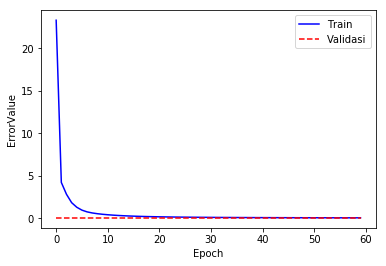

In [14]:
xAxis = saveEpoch
yTrain = saveTotalerrT
yVali = saveTotalerrV

plt.plot(yTrain,'b', yVali, 'r--')
plt.xlabel('Epoch')
plt.ylabel('ErrorValue')
plt.legend(['Train','Validasi'])
plt.show()